In [5]:
#==1==
# =========================
# פרויקט ML - שלב EDA בסיסי
# קובץ: Train.csv + Valid.csv
# נתיב בסיס: C:\Users\user\Desktop\BIU דאטה סיינס\ML\פרויקט\פרויקט מאוגד\Final project 2.9
# =========================

import os
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# הצגת טבלאות/מספרים בצורה קריאה יותר
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

# אם יש בעיות גופן בעברית בגרפים ב-Windows, אפשר לנסות:
# plt.rcParams['font.family'] = 'Arial'


# סיכום מילולי (שורת מלל אחת): מה נעשה פה ומה יצא
print("[סיכום #==1==] ייבאנו ספריות וקבענו הגדרות תצוגה; לא נטען דאטה עדיין — זהו שלב הכנת סביבת העבודה בלבד.")

[סיכום #==1==] ייבאנו ספריות וקבענו הגדרות תצוגה; לא נטען דאטה עדיין — זהו שלב הכנת סביבת העבודה בלבד.


In [6]:
#==2==
# -------------------------
# 1) נתיב בסיס לפרויקט
# -------------------------
PROJECT_DIR = r"C:\Users\oritp\OneDrive\Desktop\project"

# נוודא שאנחנו בתיקייה הנכונה (כדי שיהיה אפשר לקרוא קבצים בלי נתיב מלא)
try:
    os.chdir(PROJECT_DIR)
    print(f"[OK] Changed working directory to:\n{os.getcwd()}")
except Exception as e:
    print("[WARN] Failed to change directory. Using current working dir instead.")
    print("Error:", e)

# -------------------------
# 2) שמות קבצים
# -------------------------
TRAIN_PATH = "Train.csv"                 # חייב לכלול SalePrice
VALID_PATH = "Valid.csv"                 # בלי SalePrice
SAMPLE_SUB_PATH = "sample_submission.csv"  # אופציונלי - תבנית הגשה (אם יש)
DATA_DICT_PATH = "Data Dictionary.xlsx"    # אופציונלי - מילון עמודות (אם יש)

# -------------------------
# 3) בדיקת קיום הקבצים
# -------------------------
def check_exists(path):
    exists = os.path.exists(path)
    print(f"{'[OK]':<5} {path}" if exists else f"[MISS] {path}")
    return exists

print("\n[Files in project dir]")
_ = [print(" -", nm) for nm in os.listdir(".")]

print("\n[Check required files]")
has_train = check_exists(TRAIN_PATH)
has_valid = check_exists(VALID_PATH)
has_sample = check_exists(SAMPLE_SUB_PATH)
has_dict  = check_exists(DATA_DICT_PATH)

assert has_train,  "חסר Train.csv בתיקייה! ודאי שהנתיב נכון."
assert has_valid,  "חסר Valid.csv בתיקייה! ודאי שהנתיב נכון."

print("\n[INFO] All required files detected ✅")


# סיכום מילולי (שורת מלל אחת): מה נעשה פה ומה יצא
print(f"[סיכום #==2==] הגדרנו תיקיית עבודה, הצגנו את תכולת התיקייה ואימתנו קיום קבצי Train/Valid "
      f"(Train={has_train}, Valid={has_valid}, sample_submission={has_sample}, data_dict={has_dict}). "
      "בשלב זה רק וידוא קבצים—עדיין לא נטען דאטה.")


[WARN] Failed to change directory. Using current working dir instead.
Error: [WinError 3] The system cannot find the path specified: 'C:\\Users\\oritp\\OneDrive\\Desktop\\project'

[Files in project dir]
 - .ipynb_checkpoints
 - .jupyter
 - 10321802.png
 - 276-2769230_networking-deep-neural-network-icon.png
 - ChatGPT Image Sep 3, 2025, 01_30_51 PM.png
 - ChatGPT Image Sep 3, 2025, 12_51_15 PM.png
 - DS20 Basic ML project - zohar- 28.08.25.ipynb
 - networking-deep-neural-network-icon--m2H7i8m2N4N4d3b1.jpg
 - random_forest_project- Hydraulic Hooligans.pptx
 - random_forest_project.pptx
 - Train.csv
 - Untitled.ipynb
 - Valid.csv
 - Version8 - 7Sub.ipynb
 - ~$random_forest_project- Hydraulic Hooligans.pptx
 - יומן פרויקט.docx
 - מצגת בסיס.pptx
 - פעולות להמשך לאחר איחוד חוברות.docx
 - צילום מסך 2025-09-03 130938.png
 - תסריט מצגת.docx

[Check required files]
[OK]  Train.csv
[OK]  Valid.csv
[MISS] sample_submission.csv
[MISS] Data Dictionary.xlsx

[INFO] All required files detected ✅
[סיכ

In [7]:
#==3==
# -------------------------
# 4) טעינת הקבצים ל-DataFrame
#    encoding='utf-8-sig' לפעמים מציל מכותרות משובשות
#    low_memory=False כדי ש-pandas לא יחלק טעינה לחתיכות (טיפוסי עמודות יציבים יותר)
# -------------------------
read_kwargs = dict(encoding='utf-8-sig', low_memory=False)

train = pd.read_csv(TRAIN_PATH, **read_kwargs)
valid = pd.read_csv(VALID_PATH, **read_kwargs)

print(f"[OK] train shape: {train.shape}")
print(f"[OK] valid shape: {valid.shape}")

# -------------------------
# 5) בדיקות בסיסיות לעמודות מפתח
# -------------------------
assert 'SalePrice' in train.columns, "Train.csv חייב לכלול עמודה SalePrice!"
assert 'SalesID'  in train.columns, "Train.csv חייב לכלול SalesID!"
assert 'SalesID'  in valid.columns, "Valid.csv חייב לכלול SalesID!"

# בדיקה שאין בטעות SalePrice ב-Valid (אסור!)
if 'SalePrice' in valid.columns:
    raise ValueError("אסור שתהיה עמודת SalePrice ב-Valid.csv — בדקי את הקובץ!")

print("[INFO] Key columns exist and are consistent ✅")

# =========================
# (added) אבחונים שימושיים מוקדמים
# =========================
from pprint import pprint

# 1) אילו עמודות יש ב-Train ולא ב-Valid (מלבד SalePrice), והפוך
train_cols = set(train.columns)
valid_cols = set(valid.columns)

extra_in_train = sorted([c for c in (train_cols - valid_cols) if c != 'SalePrice'])
extra_in_valid = sorted(list(valid_cols - train_cols))

print("\n[CHECK] Column alignment (Train vs Valid)")
print(f"- Columns only in TRAIN (excluding 'SalePrice'): {len(extra_in_train)}")
if extra_in_train[:10]:
    print("  sample:", extra_in_train[:10])
print(f"- Columns only in VALID: {len(extra_in_valid)}")
if extra_in_valid[:10]:
    print("  sample:", extra_in_valid[:10])

# 2) בדיקת טיפוסים שונים לאותה עמודה בין Train ל-Valid (נפוץ כשיש ערכי NaN/מספרים כמחרוזות)
common = sorted(list((train_cols & valid_cols) - {'SalePrice'}))
dtype_mismatch = []
for c in common:
    if train[c].dtype != valid[c].dtype:
        dtype_mismatch.append((c, str(train[c].dtype), str(valid[c].dtype)))

print("\n[CHECK] Dtype mismatches between TRAIN and VALID")
print(f"- Count: {len(dtype_mismatch)}")
if dtype_mismatch[:10]:
    for name, dt_tr, dt_va in dtype_mismatch[:10]:
        print(f"  {name}: train={dt_tr} | valid={dt_va}")

# 3) בדיקת ייחודיות ותקינות של SalesID (חשוב לקובץ ההגשה)
dup_train = train['SalesID'].duplicated().sum()
dup_valid = valid['SalesID'].duplicated().sum()
nan_train_id = train['SalesID'].isna().sum()
nan_valid_id = valid['SalesID'].isna().sum()

print("\n[CHECK] SalesID health")
print(f"- TRAIN duplicates: {dup_train} | NaN: {nan_train_id}")
print(f"- VALID duplicates: {dup_valid} | NaN: {nan_valid_id}")
if dup_valid > 0 or nan_valid_id > 0:
    print("[WARN] ב-Valid חייבים מזהים ייחודיים וללא NaN לצורך submission!")

# 4) סטטיסטיקות בסיס ל-Target (לא משנה כלום בדאטה, רק מידע)
sp = train['SalePrice'].dropna()
print("\n[STATS] SalePrice (TRAIN)")
print(f"- count={sp.size:,} | mean={sp.mean():,.0f} | median={sp.median():,.0f} | std={sp.std():,.0f}")
print(f"- min={sp.min():,.0f} | max={sp.max():,.0f}")

# 5) שימוש בזיכרון (להערכת גודל הדאטה, לא חובה אבל טוב לדעת)
mem_train_mb = train.memory_usage(deep=True).sum() / (1024**2)
mem_valid_mb = valid.memory_usage(deep=True).sum() / (1024**2)
print("\n[INFO] Memory usage (deep): "
      f"TRAIN ~ {mem_train_mb:.1f} MB | VALID ~ {mem_valid_mb:.1f} MB")



# -------------------------
# סיכום מילולי: מה נעשה פה ומה יצא
# -------------------------
summary_lines = []
summary_lines.append("[סיכום #==3==] טענו את קבצי ה-CSV ל-DataFrame וביצענו בדיקות תקינות בסיסיות.")
summary_lines.append(f"- ממדים: TRAIN={train.shape[0]:,}×{train.shape[1]}, VALID={valid.shape[0]:,}×{valid.shape[1]} (ההפרש בעמודה 'SalePrice' בלבד).")
summary_lines.append("- בדיקות מפתח: 'SalePrice' קיים רק ב-Train; 'SalesID' קיים בשניהם ✅.")
if extra_in_train or extra_in_valid:
    summary_lines.append(f"- התאמת עמודות: נמצאו אי-הלימה (Train-only={len(extra_in_train)}, Valid-only={len(extra_in_valid)}).")
else:
    summary_lines.append("- התאמת עמודות: סט העמודות זהה בין Train ל-Valid (מלבד SalePrice) ✅.")
summary_lines.append(f"- טיפוסים שונים בין הקבצים: נמצאו {len(dtype_mismatch)} עמודות עם mismatch.")
if any(name == 'auctioneerID' for name, *_ in dtype_mismatch):
    summary_lines.append("  • דוגמה: auctioneerID – ב-Train כ-float וב-Valid כ-int (כנראה בגלל NaN). נטפל בזה בפייפליין ע\"י המרה ל-string ו-One-Hot.")
summary_lines.append(f"- SalesID: כפילויות TRAIN={dup_train}, VALID={dup_valid}; NaN TRAIN={nan_train_id}, VALID={nan_valid_id} (נראה תקין).")
summary_lines.append(f"- סטטיסטיקות Target: mean≈{sp.mean():,.0f}, median≈{sp.median():,.0f}, std≈{sp.std():,.0f}, טווח=[{sp.min():,.0f}, {sp.max():,.0f}].")
summary_lines.append(f"- שימוש בזיכרון: TRAIN≈{mem_train_mb:.1f}MB, VALID≈{mem_valid_mb:.1f}MB.")
summary_lines.append("- הצעד הבא: EDA תיאורי (info/describe/head) + טבלת חסרים והתפלגויות לצורך הבנת איכות הנתונים לפני בניית Pipeline.")
print("\n".join(summary_lines))


[OK] train shape: (401125, 53)
[OK] valid shape: (11573, 52)
[INFO] Key columns exist and are consistent ✅

[CHECK] Column alignment (Train vs Valid)
- Columns only in TRAIN (excluding 'SalePrice'): 0
- Columns only in VALID: 0

[CHECK] Dtype mismatches between TRAIN and VALID
- Count: 1
  auctioneerID: train=float64 | valid=int64

[CHECK] SalesID health
- TRAIN duplicates: 0 | NaN: 0
- VALID duplicates: 0 | NaN: 0

[STATS] SalePrice (TRAIN)
- count=401,125 | mean=31,100 | median=24,000 | std=23,037
- min=4,750 | max=142,000

[INFO] Memory usage (deep): TRAIN ~ 762.4 MB | VALID ~ 22.0 MB
[סיכום #==3==] טענו את קבצי ה-CSV ל-DataFrame וביצענו בדיקות תקינות בסיסיות.
- ממדים: TRAIN=401,125×53, VALID=11,573×52 (ההפרש בעמודה 'SalePrice' בלבד).
- בדיקות מפתח: 'SalePrice' קיים רק ב-Train; 'SalesID' קיים בשניהם ✅.
- התאמת עמודות: סט העמודות זהה בין Train ל-Valid (מלבד SalePrice) ✅.
- טיפוסים שונים בין הקבצים: נמצאו 1 עמודות עם mismatch.
  • דוגמה: auctioneerID – ב-Train כ-float וב-Valid כ-int (

In [9]:
#==3c==
# -------------------------
# CPI utilities: deflator & inflator (FRED)
# -------------------------
!pip install pandas_datareader

import pandas as pd
import numpy as np
from pandas_datareader import data as pdr

def deflator(
    df: pd.DataFrame,
    sale_date_col: str,
    nominal_price_col: str,
    base_month: str | pd.Timestamp | None = None,  # None -> latest CPI month
    new_col: str = "BasePrice",
    fred_series: str = "CPIAUCSL",   # US CPI SA; use "CPIAUCNS" for NSA
    out_of_range: str = "ffill",     # 'error' | 'ffill' | 'bfill'
) -> pd.DataFrame:
    """
    Add a 'BasePrice' (real) column by deflating nominal prices using CPI from FRED.
    Formula: real_t = nominal_t * (CPI_base / CPI_t)
    """
    out = df.copy()
    # Normalize sale dates to month-end (CPI is monthly)
    out["_sale_period"] = pd.to_datetime(out[sale_date_col], errors="coerce").dt.to_period("M").dt.to_timestamp("M")
    if out["_sale_period"].isna().any():
        raise ValueError(f"Some '{sale_date_col}' values could not be parsed to dates.")

    # Window to fetch CPI
    earliest = out["_sale_period"].min()
    latest   = out["_sale_period"].max()

    bm = base_month
    if bm is not None and not (isinstance(bm, str) and bm.lower() == "latest"):
        bm_ts = pd.to_datetime(bm, errors="coerce")
        if pd.isna(bm_ts):
            raise ValueError("base_month must be None, 'latest', or a valid date like 'YYYY-MM'/'YYYY-MM-DD'.")
        bm_ts = bm_ts.to_period("M").to_timestamp("M")
        earliest = min(earliest, bm_ts)
        latest   = max(latest, bm_ts)

    start = (earliest - pd.offsets.DateOffset(years=2)).strftime("%Y-%m-%d")
    end   = (latest   + pd.offsets.DateOffset(years=2)).strftime("%Y-%m-%d")

    # Fetch CPI from FRED
    cpi = pdr.DataReader(fred_series, "fred", start=start, end=end).rename(columns={fred_series: "cpi_value"})
    cpi.index = pd.to_datetime(cpi.index).to_period("M").to_timestamp("M")
    cpi = cpi[~cpi.index.duplicated(keep="last")].sort_index()
    cpi = cpi.assign(cpi_period=cpi.index).reset_index(drop=True)  # columns: cpi_period, cpi_value

    # Resolve base month
    if bm is None or (isinstance(bm, str) and bm.lower() == "latest"):
        base_ts = cpi["cpi_period"].max()
    else:
        base_ts = bm_ts
        if base_ts not in set(cpi["cpi_period"]):
            # snap to nearest available CPI month
            base_ts = cpi.loc[(cpi["cpi_period"] - base_ts).abs().argsort().iloc[0], "cpi_period"]

    cpi_base = float(cpi.loc[cpi["cpi_period"] == base_ts, "cpi_value"].iloc[0])

    # Merge CPI to sales and handle coverage
    out = out.merge(cpi, left_on="_sale_period", right_on="cpi_period", how="left")

    if out_of_range == "error":
      if out["cpi_value"].isna().any():
        raise ValueError("Some sale dates are outside CPI coverage. Use out_of_range='ffill' or 'bfill'.")
      elif out_of_range == "ffill":
        out["cpi_value"] = out["cpi_value"].ffill()
      elif out_of_range == "bfill":
        out["cpi_value"] = out["cpi_value"].bfill()
      else:
          raise ValueError("out_of_range must be 'error', 'ffill', or 'bfill'.")

    # Ensure price numeric, then deflate
    if not np.issubdtype(out[nominal_price_col].dtype, np.number):
        out[nominal_price_col] = pd.to_numeric(out[nominal_price_col], errors="coerce")
    if out[nominal_price_col].isna().any():
        raise ValueError(f"Column '{nominal_price_col}' has non-numeric or missing values after parsing.")

    out[new_col] = out[nominal_price_col] * (cpi_base / out["cpi_value"])
    return out.drop(columns=["_sale_period", "cpi_period", "cpi_value"])


def inflator(
    df: pd.DataFrame,
    sale_date_col: str,
    real_price_col: str,
    base_month: str | pd.Timestamp | None = None,  # None -> latest CPI month
    new_col: str = "SalePrice_from_real",
    fred_series: str = "CPIAUCSL",
    out_of_range: str = "ffill",
) -> pd.DataFrame:
    """
    Inflate a base-month real price back to nominal at each sale date using CPI from FRED.
    Formula: nominal_t = real_B * (CPI_t / CPI_B)
    """
    out = df.copy()
    out["_sale_period"] = pd.to_datetime(out[sale_date_col], errors="coerce").dt.to_period("M").dt.to_timestamp("M")
    if out["_sale_period"].isna().any():
        raise ValueError(f"Some '{sale_date_col}' values could not be parsed to dates.")

    earliest = out["_sale_period"].min()
    latest   = out["_sale_period"].max()

    bm = base_month
    if bm is not None and not (isinstance(bm, str) and bm.lower() == "latest"):
        bm_ts = pd.to_datetime(bm, errors="coerce")
        if pd.isna(bm_ts):
            raise ValueError("base_month must be None, 'latest', or a valid date like 'YYYY-MM'/'YYYY-MM-DD'.")
        bm_ts = bm_ts.to_period("M").to_timestamp("M")
        earliest = min(earliest, bm_ts)
        latest   = max(latest, bm_ts)

    start = (earliest - pd.offsets.DateOffset(years=2)).strftime("%Y-%m-%d")
    end   = (latest   + pd.offsets.DateOffset(years=2)).strftime("%Y-%m-%d")

    cpi = pdr.DataReader(fred_series, "fred", start=start, end=end).rename(columns={fred_series: "cpi_value"})
    cpi.index = pd.to_datetime(cpi.index).to_period("M").to_timestamp("M")
    cpi = cpi[~cpi.index.duplicated(keep="last")].sort_index()
    cpi = cpi.assign(cpi_period=cpi.index).reset_index(drop=True)

    if bm is None or (isinstance(bm, str) and bm.lower() == "latest"):
        base_ts = cpi["cpi_period"].max()
    else:
        base_ts = bm_ts
        if base_ts not in set(cpi["cpi_period"]):
            base_ts = cpi.loc[(cpi["cpi_period"] - base_ts).abs().argsort().iloc[0], "cpi_period"]

    cpi_base = float(cpi.loc[cpi["cpi_period"] == base_ts, "cpi_value"].iloc[0])

    out = out.merge(cpi, left_on="_sale_period", right_on="cpi_period", how="left")


    if out_of_range == "error":
      if out["cpi_value"].isna().any():
        raise ValueError("Some sale dates are outside CPI coverage. Use out_of_range='ffill' or 'bfill'.")
      elif out_of_range == "ffill":
        out["cpi_value"] = out["cpi_value"].ffill()
      elif out_of_range == "bfill":
        out["cpi_value"] = out["cpi_value"].bfill()
      else:
          raise ValueError("out_of_range must be 'error', 'ffill', or 'bfill'.")



    if not np.issubdtype(out[real_price_col].dtype, np.number):
        out[real_price_col] = pd.to_numeric(out[real_price_col], errors="coerce")
    if out[real_price_col].isna().any():
        raise ValueError(f"Column '{real_price_col}' has non-numeric or missing values after parsing.")

    out[new_col] = out[real_price_col] * (out["cpi_value"] / cpi_base)
    return out.drop(columns=["_sale_period", "cpi_period", "cpi_value"])


# Optional: pick a shared base month for the project
CPI_BASE_MONTH = None  # or 'latest' or '2020-01'


   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.0 MB ? eta -:--:--
   -------------------- ------------------- 2.1/4.0 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 8.4 MB/s  0:00:00

   ---------------------------------------- 0/2 [lxml]
   -------------------- ------------------- 1/2 [pandas_datareader]
   ---------------------------------------- 2/2 [pandas_datareader]



C:\Users\zoars\AppData\Local\Temp\ipykernel_10796\4110560989.py:6: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Train.csv")


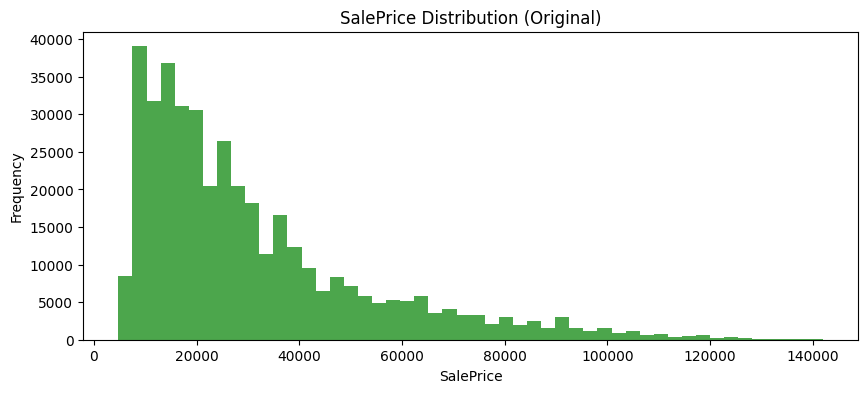

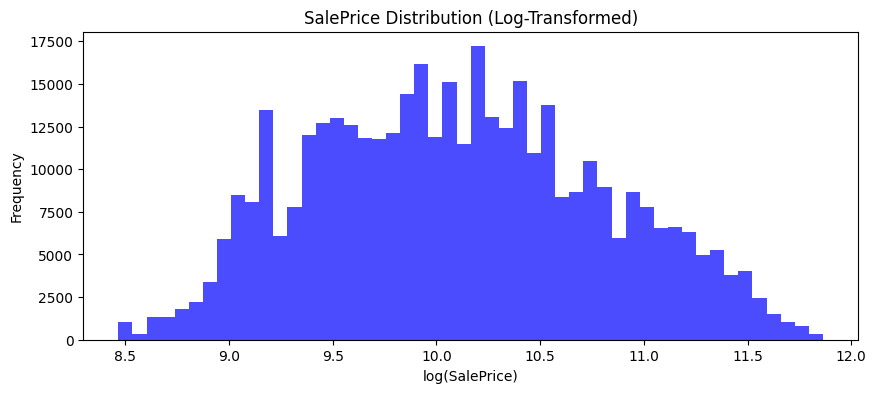

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# נטען את הקובץ (נניח שיש לך Train.csv)
df = pd.read_csv("Train.csv")

# נוודא שעמודת SalePrice קיימת
sp = df["SalePrice"].dropna()

# ציור ההיסטוגרמה המקורית
plt.figure(figsize=(10,4))
plt.hist(sp, bins=50, color="green", alpha=0.7)
plt.title("SalePrice Distribution (Original)")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# ציור ההיסטוגרמה אחרי log
plt.figure(figsize=(10,4))
plt.hist(np.log1p(sp), bins=50, color="blue", alpha=0.7)
plt.title("SalePrice Distribution (Log-Transformed)")
plt.xlabel("log(SalePrice)")
plt.ylabel("Frequency")
plt.show()


In [12]:
#==3d==
# -------------------------
# Build 'BasePrice' (real) target and switch label to it (robust to column names)
# -------------------------
import re
import numpy as np
import pandas as pd

assert 'train' in globals(), "Run #==3== first (data load)."

# 1) Helpers
def _find_col(df, candidates, required=True, prefer_exact=None):
    """
    Find a column in df among candidates (case-insensitive).
    If prefer_exact is given, prefer that exact name if present.
    """
    cols = list(df.columns)
    cols_ci = {c.casefold(): c for c in cols}
    # prefer exact, case-sensitive
    if prefer_exact and prefer_exact in df.columns:
        return prefer_exact
    # then try case-insensitive matches in order
    for cand in candidates:
        if cand in df.columns:           # exact
            return cand
        if cand.casefold() in cols_ci:   # case-insensitive
            return cols_ci[cand.casefold()]
    if required:
        raise KeyError(f"None of {candidates} found in columns: {cols[:20]}{'...' if len(cols)>20 else ''}")
    return None

def _ensure_saledate_standard(df, detected_date_col):
    """Guarantee a 'saledate' column exists, copying from the detected date column if needed."""
    if detected_date_col != 'saledate':
        # don't overwrite if already present and different
        if 'saledate' not in df.columns:
            df['saledate'] = df[detected_date_col]
    return df

# 2) Detect the sale-date column (robust)
date_candidates = [
    'saledate', 'sale_date', 'SaleDate', 'saleDate', 'SALEDATE',
    'date', 'Date', 'transaction_date', 'TransactionDate'
]
sale_date_col_train = _find_col(train, date_candidates, required=True, prefer_exact='saledate')
train = _ensure_saledate_standard(train, sale_date_col_train)

if 'valid' in globals():
    try:
        sale_date_col_valid = _find_col(valid, date_candidates, required=True, prefer_exact='saledate')
        valid = _ensure_saledate_standard(valid, sale_date_col_valid)
    except KeyError:
        # some projects have no valid yet, or it's test-only without a date
        pass

# 3) Detect the nominal target column
#    Prefer (in order): explicit label_col (if exists and in df), 'SalePrice', any column containing 'price'
nominal_candidates = ['SalePrice', 'saleprice', 'Price', 'price', 'PRICE']
label_guess = None
if 'label_col' in globals() and label_col in train.columns:
    label_guess = label_col
else:
    # try standard candidates
    try:
        label_guess = _find_col(train, nominal_candidates, required=False, prefer_exact='SalePrice')
    except KeyError:
        label_guess = None
    # fall back: any numeric column with 'price' in its name
    if label_guess is None:
        price_like = [c for c in train.columns if re.search('price', c, flags=re.I)]
        # choose the one that most looks like the old label
        if price_like:
            # prefer 'SalePrice' case-insensitive if present
            pref = [c for c in price_like if c.lower() == 'saleprice']
            label_guess = pref[0] if pref else price_like[0]

# 4) Deflate if we actually have a nominal target
if label_guess is None:
    print("[#==3d==] No nominal target column was found in 'train'. Skipping deflation.")
    print("          Training will continue with whatever 'label_col' is set elsewhere.")
else:
    # Use the CPI helpers defined in #==3c==
    assert all(fn in globals() for fn in ['deflator','inflator','CPI_BASE_MONTH']), \
        "Missing CPI helpers. Run #==3c== first."

    # build BasePrice on train
    train = deflator(
        train,
        sale_date_col='saledate',            # standardized name
        nominal_price_col=label_guess,       # detected nominal column
        base_month=CPI_BASE_MONTH,
        new_col='BasePrice'
    )
    # If valid also has the same nominal target, deflate there too (optional)
    if 'valid' in globals() and label_guess in getattr(valid, 'columns', []):
        valid = deflator(
            valid,
            sale_date_col='saledate',
            nominal_price_col=label_guess,
            base_month=CPI_BASE_MONTH,
            new_col='BasePrice'
        )
        print("[#==3d==] Built BasePrice for: train & valid.")
    else:
        print("[#==3d==] Built BasePrice for: train (valid skipped or missing target).")

    # Switch modeling target to real dollars
    label_real_col = 'BasePrice'
    label_col = label_real_col
    print(f"[#==3d==] label_col set to '{label_col}'.  (Nominal source was '{label_guess}')")

# 5) Let later cells know which sale-date column to expect (standardized)
SALEDATE_COL = 'saledate'
print(f"[#==3d==] Using standardized sale date column: {SALEDATE_COL}")


[#==3d==] Built BasePrice for: train (valid skipped or missing target).
[#==3d==] label_col set to 'BasePrice'.  (Nominal source was 'BasePrice')
[#==3d==] Using standardized sale date column: saledate


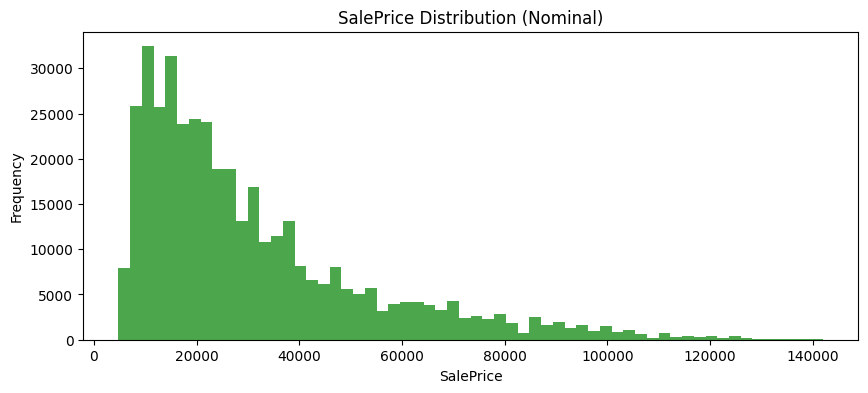

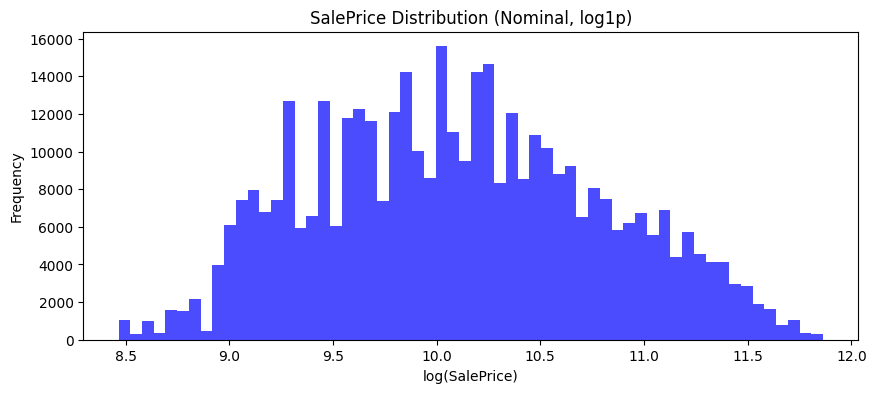

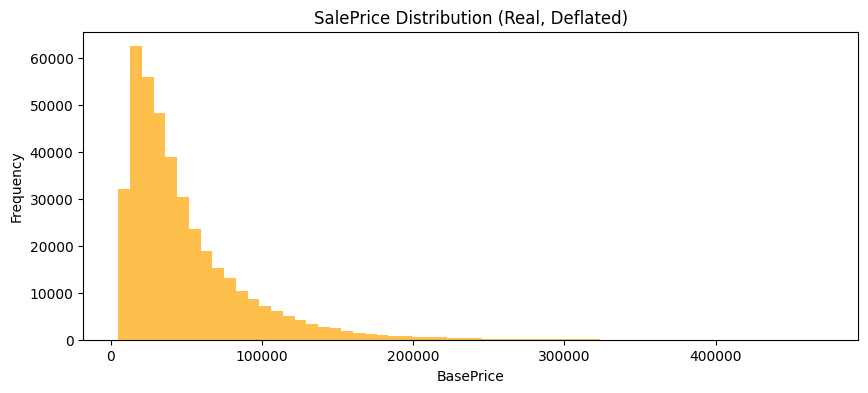

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# נניח שיש לך DataFrame בשם train עם SalePrice ו/או BasePrice

# היסטוגרמה של המחיר הנומינלי
plt.figure(figsize=(10,4))
plt.hist(train["SalePrice"].dropna(), bins=60, color="green", alpha=0.7)
plt.title("SalePrice Distribution (Nominal)")
plt.xlabel("SalePrice"); plt.ylabel("Frequency")
plt.show()

# היסטוגרמה של המחיר הנומינלי אחרי log
plt.figure(figsize=(10,4))
plt.hist(np.log1p(train["SalePrice"].dropna()), bins=60, color="blue", alpha=0.7)
plt.title("SalePrice Distribution (Nominal, log1p)")
plt.xlabel("log(SalePrice)"); plt.ylabel("Frequency")
plt.show()

# היסטוגרמה של המחיר הריאלי (BasePrice) אם יש
if "BasePrice" in train.columns:
    plt.figure(figsize=(10,4))
    plt.hist(train["BasePrice"].dropna(), bins=60, color="orange", alpha=0.7)
    plt.title("SalePrice Distribution (Real, Deflated)")
    plt.xlabel("BasePrice"); plt.ylabel("Frequency")
    plt.show()



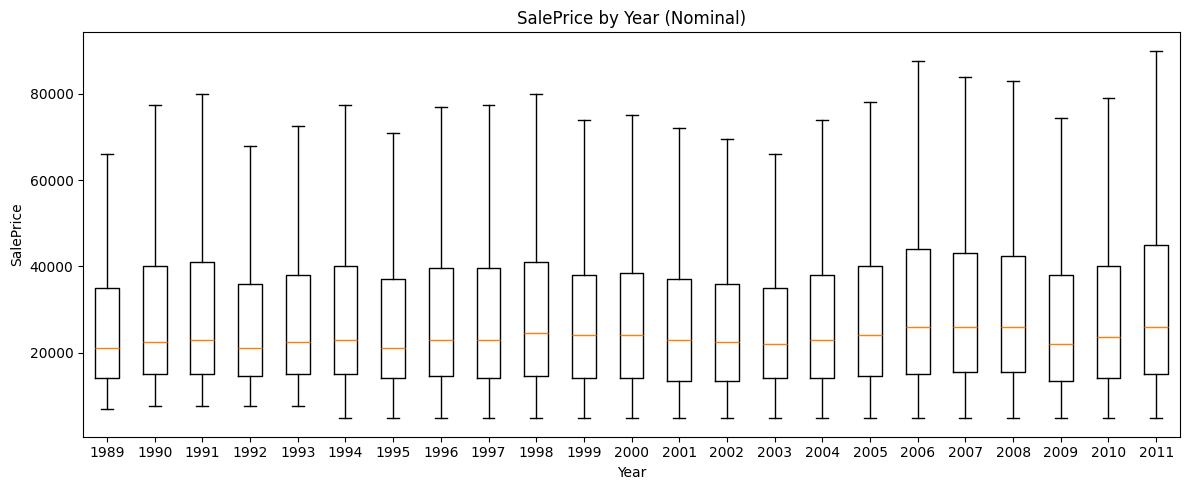

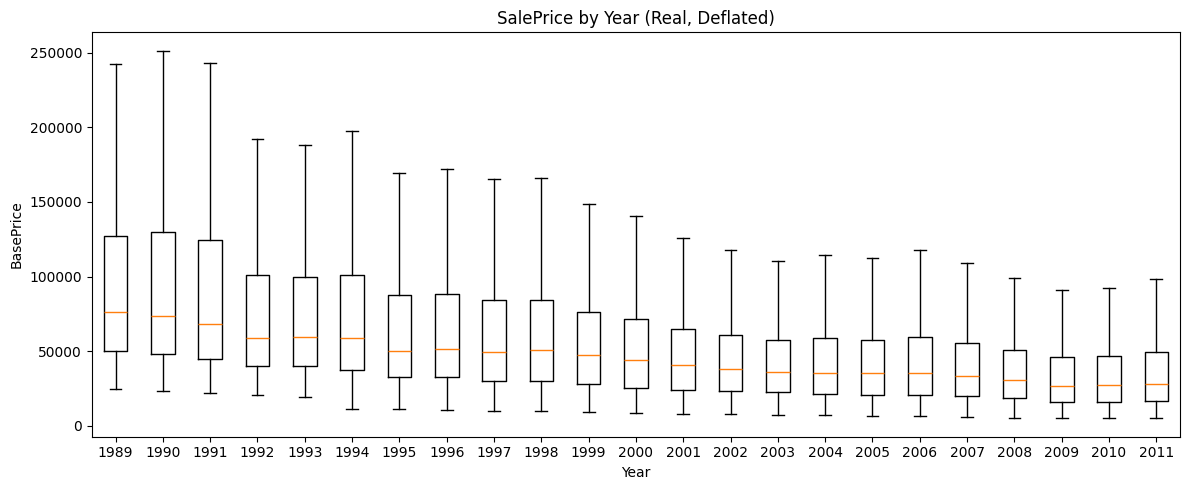

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ודאי שהתאריך בפורמט datetime
train["saledate"] = pd.to_datetime(train["saledate"], errors="coerce")

# נחלץ שנה וננקה NA
year = train["saledate"].dt.year
nom = train["SalePrice"]
df_nom = pd.DataFrame({"year": year, "val": nom}).dropna()
df_nom["year"] = df_nom["year"].astype(int)

# נכין את הנתונים לקופסאות: רשימת-arrays לפי סדר השנים
years_nom = sorted(df_nom["year"].unique())
data_nom = [df_nom.loc[df_nom["year"] == y, "val"].values for y in years_nom]

plt.figure(figsize=(12,5))
plt.boxplot(data_nom, tick_labels=years_nom, showfliers=False)
plt.title("SalePrice by Year (Nominal)")
plt.xlabel("Year"); plt.ylabel("SalePrice")
plt.tight_layout()
plt.show()

# אם יש BasePrice – גם גרסה ריאלית
if "BasePrice" in train.columns:
    real = train["BasePrice"]
    df_real = pd.DataFrame({"year": year, "val": real}).dropna()
    df_real["year"] = df_real["year"].astype(int)

    years_real = sorted(df_real["year"].unique())
    data_real = [df_real.loc[df_real["year"] == y, "val"].values for y in years_real]

    plt.figure(figsize=(12,5))
    plt.boxplot(data_real, tick_labels=years_real, showfliers=False)
    plt.title("SalePrice by Year (Real, Deflated)")
    plt.xlabel("Year"); plt.ylabel("BasePrice")
    plt.tight_layout()
    plt.show()


In [ ]:
#==4==
# -------------------------
# 6) EDA בסיסי: מבנה וסטטיסטיקות
# -------------------------
print("\n=== TRAIN.info() ===")
train_info = train.info()

print("\n=== TRAIN.describe() (numeric) ===")
display(train.describe(include=[np.number]).T)

print("\n=== TRAIN.describe(include='object') (categorical sample) ===")
display(train.describe(include=['object']).T.head(30))  # עד 30 קטגוריאליות לצפייה

print("\n=== TRAIN.head() ===")
display(train.head(5))

print("\n=== VALID.head() ===")
display(valid.head(5))




from IPython.display import display, Markdown

# 1) התפלגות SalePrice
if "SalePrice" in train.columns:
    fig = plt.figure(figsize=(8,4))
    plt.hist(train["SalePrice"].dropna(), bins=50)
    plt.title("Distribution of SalePrice (Train)")
    plt.xlabel("SalePrice (USD)"); plt.ylabel("Count")
    plt.tight_layout(); plt.show()

    # log1p(SalePrice) כדי לראות האם יש הטיה חזקה
    fig = plt.figure(figsize=(8,4))
    plt.hist(np.log1p(train["SalePrice"].dropna()), bins=50)
    plt.title("Distribution of log1p(SalePrice) (Train)")
    plt.xlabel("log1p(SalePrice)"); plt.ylabel("Count")
    plt.tight_layout(); plt.show()

# 2) ספירת רשומות לפי שנת מכירה (נגזר מ-saledate)
if "saledate" in train.columns:
    sale_year = pd.to_datetime(train["saledate"], errors="coerce").dt.year
    counts_by_year = sale_year.value_counts().sort_index()
    if len(counts_by_year) > 0:
        fig = plt.figure(figsize=(10,4))
        counts_by_year.plot(kind="bar")
        plt.title("Count of Records by Sale Year (Train)")
        plt.xlabel("Sale Year"); plt.ylabel("Count")
        plt.tight_layout(); plt.show()

        # ממוצע מחיר לפי שנת מכירה
        tmp = pd.DataFrame({"SaleYear": sale_year, "SalePrice": train["SalePrice"]}).dropna()
        if not tmp.empty:
            avg_price_by_year = tmp.groupby("SaleYear")["SalePrice"].mean()
            fig = plt.figure(figsize=(10,4))
            avg_price_by_year.plot(kind="line", marker="o")
            plt.title("Average SalePrice by Sale Year (Train)")
            plt.xlabel("Sale Year"); plt.ylabel("Average SalePrice (USD)")
            plt.tight_layout(); plt.show()

# 3) ממוצע מחיר לפי ProductGroup (אם קיים)
if "ProductGroup" in train.columns and "SalePrice" in train.columns:
    avg_by_group = (
        train.groupby("ProductGroup")["SalePrice"]
             .mean()
             .sort_values(ascending=False)
    )
    fig = plt.figure(figsize=(8,4))
    avg_by_group.plot(kind="bar")
    plt.title("Average SalePrice by ProductGroup (Train)")
    plt.xlabel("ProductGroup"); plt.ylabel("Average SalePrice (USD)")
    plt.tight_layout(); plt.show()

# 4) Boxplot של SalePrice לפי ProductGroup (matplotlib נקי, בלי seaborn)
if "ProductGroup" in train.columns and "SalePrice" in train.columns:
    # סדר הקבוצות לפי הממוצע (כדי שייראה טוב) — משתמשים במה שחושב בסעיף הקודם אם קיים
    try:
        order = avg_by_group.index.tolist()
    except NameError:
        order = (
            train.groupby("ProductGroup")["SalePrice"].mean()
                 .sort_values(ascending=False).index.tolist()
        )
    data_for_box = [train.loc[train["ProductGroup"] == g, "SalePrice"].dropna().values for g in order]
    if len(data_for_box) > 0:
        fig = plt.figure(figsize=(10,4))
        plt.boxplot(data_for_box, labels=order, showfliers=False)
        plt.title("SalePrice by ProductGroup (Boxplot)")
        plt.xlabel("ProductGroup"); plt.ylabel("SalePrice (USD)")
        plt.tight_layout(); plt.show()

# 5) ממוצע מחיר לפי YearMade (מסננים שנים לא הגיוניות רק לחישוב)
if "YearMade" in train.columns and "SalePrice" in train.columns:
    valid_years = train["YearMade"].where(train["YearMade"] >= 1900)
    tmp = pd.DataFrame({"YearMade": valid_years, "SalePrice": train["SalePrice"]}).dropna()
    if not tmp.empty:
        avg_by_yearmade = tmp.groupby("YearMade")["SalePrice"].mean().sort_index()
        fig = plt.figure(figsize=(10,4))
        avg_by_yearmade.plot(kind="line")
        plt.title("Average SalePrice by YearMade (Train)")
        plt.xlabel("YearMade"); plt.ylabel("Average SalePrice (USD)")
        plt.tight_layout(); plt.show()




# -------------------------
# סיכום מילולי: מה נעשה פה ומה יצא (#==4==)
# -------------------------
summary_lines = []

# א) תיאור כללי של מה שעשינו בסקשן
summary_lines.append("[סיכום #==4==] הצגנו EDA בסיסי: info/describe/head לטבלת Train,"
                     " וכן גרפים משלימים (התפלגות SalePrice, מגמות לפי שנת מכירה, ProductGroup ו-YearMade).")
summary_lines.append("לא שינינו את הנתונים—רק הסתכלנו עליהם מבחוץ, כדי להבין מבנה, חסרים ומגמות כלליות.")

# ב) פרטים מסכמים קצרים מהנתונים (מחושבים כאן, בלי לשנות את ה-DF)
try:
    nrows_tr, ncols_tr = train.shape
    nrows_va, ncols_va = valid.shape
    summary_lines.append(f"- ממדי הנתונים: TRAIN={nrows_tr:,}×{ncols_tr}, VALID={nrows_va:,}×{ncols_va}.")
except Exception:
    pass

# חלוקה לסוגי עמודות (מספריות/קטגוריאליות) – אינדיקציה בלבד
try:
    n_num = train.select_dtypes(include=[np.number]).shape[1]
    n_cat = train.select_dtypes(include=['object', 'category']).shape[1]
    summary_lines.append(f"- טיפוסים ב-TRAIN: מספריות={n_num}, קטגוריאליות={n_cat}.")
except Exception:
    pass

# חסרים – Top-5 ב-Train (אחוזים)
try:
    missing_pct = (train.isna().mean() * 100).sort_values(ascending=False)
    top_miss = missing_pct.head(5)
    if len(top_miss) > 0:
        top_miss_str = ", ".join([f"{col} {pct:.0f}%" for col, pct in top_miss.items()])
        summary_lines.append(f"- חסרים (Top-5 ב-TRAIN): {top_miss_str}.")
except Exception:
    pass

# סטטיסטיקות Target SalePrice
try:
    if "SalePrice" in train.columns:
        sp = train["SalePrice"].dropna()
        if sp.size > 0:
            summary_lines.append(
                f"- SalePrice: mean≈{sp.mean():,.0f}, median≈{sp.median():,.0f}, "
                f"min={sp.min():,.0f}, max={sp.max():,.0f}, std≈{sp.std():,.0f} "
                f"(ראו היסטוגרמות כולל log1p)."
            )
except Exception:
    pass

# שנת מכירה – ספירה וטווח שנים מתוך saledate (אם קיים)
try:
    if "saledate" in train.columns:
        sale_year = pd.to_datetime(train["saledate"], errors="coerce").dt.year.dropna()
        if sale_year.size > 0:
            summary_lines.append(f"- שנת מכירה (saledate): {sale_year.nunique()} שנים בטווח "
                                 f"{int(sale_year.min())}–{int(sale_year.max())} "
                                 f"(ראו בר-צ׳רט וממוצע מחיר לפי שנה).")
except Exception:
    pass

# ProductGroup – Top-3 ממוצעי מחיר
try:
    if "ProductGroup" in train.columns and "SalePrice" in train.columns:
        top_pg = (
            train.groupby("ProductGroup")["SalePrice"]
                 .mean()
                 .sort_values(ascending=False)
                 .head(3)
        )
        if len(top_pg) > 0:
            pg_str = ", ".join([f"{k}:≈{v:,.0f}$" for k, v in top_pg.items()])
            summary_lines.append(f"- ממוצעי מחיר לפי ProductGroup (Top-3): {pg_str}.")
except Exception:
    pass

# YearMade – טווח סביר (מסננים שנים חריגות כמו 1000 רק לצורך דיווח)
try:
    if "YearMade" in train.columns:
        valid_years = train["YearMade"][train["YearMade"] >= 1900].dropna()
        if valid_years.size > 0:
            summary_lines.append(f"- YearMade: טווח שנים סביר {int(valid_years.min())}–{int(valid_years.max())} "
                                 f"(ראו קו מגמה של ממוצע מחיר לפי שנת ייצור).")
except Exception:
    pass

# שורה מסכמת למה הדבר הבא
summary_lines.append("- הצעד הבא: לבנות טבלת חסרים מסודרת ולגבש רשימות עמודות מספריות/קטגוריאליות לקראת Pipeline של הבייסליין.")

print("\n".join(summary_lines))



In [ ]:
#==5==
# -------------------------
# 7) טבלת חסרים + ויזואליזציה מתחת לכל טבלה + סיכום (מציגים את כל העמודות)
# -------------------------
from IPython.display import display, Markdown

def missing_table(df, name="DF", top=None):
    """
    מחזיר טבלה עם:
    - n_missing: מספר החסרים לעמודה
    - pct_missing: אחוז החסרים
    ממויין מהכי חסר להכי פחות.
    top: אם רוצים רק את ה-Top N (כאן לא נשתמש — מציגים הכול).
    """
    n = df.isna().sum()
    pct = (n / len(df)) * 100
    out = (
        pd.DataFrame({'n_missing': n, 'pct_missing': pct})
        .sort_values('pct_missing', ascending=False)
    )
    if top is not None:
        out = out.head(top)
    out.index.name = f"{name}_column"
    return out

# חישוב טבלאות חסרים (כל העמודות)
missing_train = missing_table(train, name="train")
missing_valid = missing_table(valid, name="valid")

# -------------------------
# A) TRAIN: טבלה (כל העמודות) ואז גרף
# -------------------------
display(Markdown("### 🟦 Missing values — TRAIN (All columns)"))
tbl_train = missing_train.round({'pct_missing': 2})
display(tbl_train)

# גרף תואם לטבלה שמעל (כל העמודות)
_plot_train = tbl_train.sort_values('pct_missing')  # ל-barh נוח מהקטן לגדול
fig = plt.figure(figsize=(9, max(4, 0.35*len(_plot_train))))
plt.barh(_plot_train.index, _plot_train['pct_missing'])
plt.xlabel("% Missing"); plt.ylabel("Column")
plt.title("Missing Columns — TRAIN (All)")
plt.tight_layout(); plt.show()

# -------------------------
# B) VALID: טבלה (כל העמודות) ואז גרף
# -------------------------
display(Markdown("### 🟨 Missing values — VALID (All columns)"))
tbl_valid = missing_valid.round({'pct_missing': 2})
display(tbl_valid)

_plot_valid = tbl_valid.sort_values('pct_missing')
fig = plt.figure(figsize=(9, max(4, 0.35*len(_plot_valid))))
plt.barh(_plot_valid.index, _plot_valid['pct_missing'])
plt.xlabel("% Missing"); plt.ylabel("Column")
plt.title("Missing Columns — VALID (All)")
plt.tight_layout(); plt.show()

# -------------------------
# C) השוואה מסונכרנת: Train מול Valid (טבלה של כל העמודות ואז גרף)
# -------------------------
display(Markdown("### 🔀 השוואת חסרים: TRAIN מול VALID (All columns)"))
missing_compare = (
    missing_train[['n_missing','pct_missing']]
      .rename(columns={'n_missing':'train_n_missing', 'pct_missing':'train_pct_missing'})
      .join(
          missing_valid[['n_missing','pct_missing']]
            .rename(columns={'n_missing':'valid_n_missing', 'pct_missing':'valid_pct_missing'}),
          how='outer'
      )
      .fillna(0)
)
# מיון לפי המקסימום מבין שני האחוזים כדי להבליט עמודות בעייתיות
missing_compare['max_pct'] = missing_compare[['train_pct_missing','valid_pct_missing']].max(axis=1)
missing_compare = missing_compare.sort_values('max_pct', ascending=False).drop(columns='max_pct')

tbl_compare = missing_compare.round({'train_pct_missing':2, 'valid_pct_missing':2})
display(tbl_compare)

# גרף תואם לטבלה (כל העמודות)
cols_for_plot = tbl_compare.index.tolist()[::-1]  # היפוך עבור barh
y = np.arange(len(cols_for_plot))
h = max(4, 0.4*len(cols_for_plot))

fig = plt.figure(figsize=(10, h))
plt.barh(y-0.2, tbl_compare.loc[cols_for_plot, 'train_pct_missing'], height=0.4, label='TRAIN')
plt.barh(y+0.2, tbl_compare.loc[cols_for_plot, 'valid_pct_missing'], height=0.4, label='VALID')
plt.yticks(y, cols_for_plot)
plt.xlabel("% Missing"); plt.ylabel("Column")
plt.title("TRAIN vs VALID — % Missing (All columns)")
plt.legend()
plt.tight_layout(); plt.show()

# -------------------------
# D) חלוקת עמודות לדליים של אחוזי חסר (טבלה ואז גרף)
# -------------------------
def pct_bucket(p):
    if p == 0: return "0%"
    elif p <= 1: return "(0–1%]"
    elif p <= 5: return "(1–5%]"
    elif p <= 10: return "(5–10%]"
    elif p <= 20: return "(10–20%]"
    elif p <= 40: return "(20–40%]"
    elif p <= 60: return "(40–60%]"
    elif p <= 80: return "(60–80%]"
    else: return "(80–100%]"

train_bucket_counts = missing_train['pct_missing'].map(pct_bucket).value_counts().sort_index()
valid_bucket_counts = missing_valid['pct_missing'].map(pct_bucket).value_counts().sort_index()

bucket_df = (
    pd.DataFrame({'train_cols': train_bucket_counts, 'valid_cols': valid_bucket_counts})
    .fillna(0).astype(int)
)

display(Markdown("### 🗂️ חלוקת עמודות לפי רמות חסר (אחוזים)"))
display(bucket_df)

# גרף תואם לטבלה (עמודות זו-לצד-זו)
idx = bucket_df.index.tolist()
x = np.arange(len(idx))
fig = plt.figure(figsize=(10, 4))
plt.bar(x-0.2, bucket_df['train_cols'], width=0.4, label='TRAIN')
plt.bar(x+0.2, bucket_df['valid_cols'], width=0.4, label='VALID')
plt.xticks(x, idx, rotation=0)
plt.ylabel("# Columns"); plt.title("Columns per Missingness Bucket")
plt.legend(); plt.tight_layout(); plt.show()

# -------------------------
# E) מועמדות להסרה (סף אחוז חסר) — טבלה ואז (אם יש) גרף
# -------------------------
THRESHOLD_DROP = 80.0
candidates_drop = missing_train[missing_train['pct_missing'] >= THRESHOLD_DROP].index.tolist()

display(Markdown(f"### 🧹 מועמדות להסרה מוקדמת (≥ {THRESHOLD_DROP:.0f}% חסרים) — TRAIN"))
candidates_df = (
    missing_train.loc[candidates_drop, ['n_missing','pct_missing']]
    .sort_values('pct_missing', ascending=False)
)
if len(candidates_df) > 0:
    display(candidates_df.round({'pct_missing':2}))
    # גרף תואם לטבלה
    _plot_cand = candidates_df.sort_values('pct_missing')
    fig = plt.figure(figsize=(9, max(3.5, 0.3*len(_plot_cand))))
    plt.barh(_plot_cand.index, _plot_cand['pct_missing'])
    plt.xlabel("% Missing"); plt.ylabel("Column")
    plt.title(f"Columns ≥ {THRESHOLD_DROP:.0f}% Missing — TRAIN")
    plt.tight_layout(); plt.show()
else:
    display(pd.DataFrame({'message': ['אין עמודות מעל הסף שנקבע']}))

# -------------------------
# F) Missingness Matrix (ויזואליזציה משלימה — אין לה טבלה תואמת)
# -------------------------
SAMPLE_ROWS = 500
TOP_COLS = 40
topcols_union = pd.Index(
    list(missing_train.head(TOP_COLS).index.union(missing_valid.head(TOP_COLS).index))
)
sample_idx = train.sample(min(SAMPLE_ROWS, len(train)), random_state=42).index
miss_matrix = train.loc[sample_idx, topcols_union].isna().astype(int).values  # 1=חסר, 0=לא

fig = plt.figure(figsize=(10, 6))
plt.imshow(miss_matrix, aspect='auto', interpolation='nearest')
plt.title(f"Missingness Matrix — TRAIN (sample={len(sample_idx)}, top cols={len(topcols_union)})")
plt.xlabel("Columns (most-missing)"); plt.ylabel("Rows (sample)")
plt.colorbar(label="1=Missing, 0=Present")
plt.tight_layout(); plt.show()

# -------------------------
# G) סיכום מילולי
# -------------------------
summary_lines = []
summary_lines.append("[סיכום #==5==] הצגנו *את כל העמודות* בטבלאות ובגרפים: TRAIN, VALID, השוואה מסונכרנת, חלוקת דליים, ומועמדות להסרה.")
summary_lines.append(f"- מספר עמודות: TRAIN={len(missing_train)}, VALID={len(missing_valid)}.")
summary_lines.append(f"- מועמדות להסרה (≥{THRESHOLD_DROP:.0f}% חסרים): {len(candidates_df)}" +
                     (f" (דוגמאות: {', '.join(candidates_df.index[:3])})" if len(candidates_df) > 0 else ""))
summary_lines.append("- הטבלאות מראות נדרש טיפול חסרים; הגרפים מבהירים סדרי גודל; ההשוואה Train↔Valid מאתרת אי-עקביות.")
summary_lines.append("- הצעד הבא בבייסליין: לקבע בפייפליין טיפול חסרים (מספריים→median, קטגוריאליים→most_frequent) "
                     "ולשקול הסרת עמודות מעל הסף כדי לצמצם רעש.")
print("\n".join(summary_lines))


In [ ]:
#==6==
# -------------------------
# 8) חלוקה ראשונית לפיצ'רים מספריים/קטגוריאליים
#    שימי לב: זה שלב EDA בלבד — לא מסירים/ממלאים עדיין.
# -------------------------
# עמודות מספריות לפי dtype (כולל float/int)
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
# עמודות קטגוריאליות (object/קטגוריה/מחרוזות)
categorical_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()

# חשוב: ה-Label וה-ID לא חלק מהפיצ'רים
label_col = 'SalePrice'
id_cols = ['SalesID']  # אפשר להרחיב בהמשך אם מזהים IDs נוספים שלא צריכים להיות בפיצ'רים

# נסיר אותם מרשימות הפיצ'רים אם מופיעים
numeric_feats = [c for c in numeric_cols if c not in ([label_col] + id_cols)]
categorical_feats = [c for c in categorical_cols if c not in id_cols]

print(f"[INFO] numeric features (count={len(numeric_feats)}): sample => {numeric_feats[:10]}")
print(f"[INFO] categorical features (count={len(categorical_feats)}): sample => {categorical_feats[:10]}")



# -------------------------
# תצוגה טבלאית מסכמת (ללא שינוי דאטה)
# -------------------------
from IPython.display import display, Markdown

def summarize_features(df, cols):
    n = len(df)
    rows = []
    for c in cols:
        n_missing = df[c].isna().sum()
        pct_missing = (n_missing / n) * 100
        nunique = df[c].nunique(dropna=True)
        rows.append({
            "feature": c,
            "dtype": str(df[c].dtype),
            "nunique": nunique,
            "n_missing": n_missing,
            "pct_missing": pct_missing
        })
    out = pd.DataFrame(rows).sort_values(["pct_missing","nunique"], ascending=[False, False]).reset_index(drop=True)
    return out

display(Markdown("### 🟦 Summary – Numeric features (all)"))
num_summary = summarize_features(train, numeric_feats)
display(num_summary.round({"pct_missing":2}))

display(Markdown("### 🟨 Summary – Categorical features (all)"))
cat_summary = summarize_features(train, categorical_feats)
display(cat_summary.round({"pct_missing":2}))

# -------------------------
# ויזואליזציה (ללא שינוי דאטה)
# -------------------------
# 1) היסטוגרמת אחוז חסרים – מספריים
fig = plt.figure(figsize=(7,4))
plt.hist(num_summary["pct_missing"], bins=20)
plt.title("Numeric features – % Missing (hist)")
plt.xlabel("% Missing"); plt.ylabel("Count of features")
plt.tight_layout(); plt.show()

# 2) היסטוגרמת אחוז חסרים – קטגוריאליים
fig = plt.figure(figsize=(7,4))
plt.hist(cat_summary["pct_missing"], bins=20)
plt.title("Categorical features – % Missing (hist)")
plt.xlabel("% Missing"); plt.ylabel("Count of features")
plt.tight_layout(); plt.show()

# 3) קרדינליות (nunique) של קטגוריאליים – ברים (כל העמודות, גודל דינמי)
_cat_card = cat_summary.sort_values("nunique", ascending=False)
fig = plt.figure(figsize=(10, max(4, 0.35*len(_cat_card))))
plt.barh(_cat_card["feature"][::-1], _cat_card["nunique"][::-1])
plt.title("Categorical features – Cardinality (nunique)")
plt.xlabel("nunique"); plt.ylabel("feature")
plt.tight_layout(); plt.show()

# 4) אינדיקציה מהירה: כמה פיצ'רים עם חסרים (>0%) בכל קבוצה
num_with_missing = int((num_summary["pct_missing"] > 0).sum())
cat_with_missing = int((cat_summary["pct_missing"] > 0).sum())

fig = plt.figure(figsize=(6,4))
x = np.arange(2)
vals = [num_with_missing, cat_with_missing]
plt.bar(x, vals)
plt.xticks(x, ["Numeric", "Categorical"])
plt.ylabel("# features with missing > 0%")
plt.title("Features with missing values (>0%)")
plt.tight_layout(); plt.show()

# -------------------------
# סיכום מילולי
# -------------------------
summary_lines = []
summary_lines.append("[סיכום #==6==] חילקנו את הפיצ'רים למספריים/קטגוריאליים והצגנו טבלאות וגרפים תומכים (ללא שינוי בדאטה).")
summary_lines.append(f"- ספירה: מספריים={len(numeric_feats)}, קטגוריאליים={len(categorical_feats)}.")
summary_lines.append(f"- עם חסרים (>0%): מספריים={num_with_missing}, קטגוריאליים={cat_with_missing}.")
# רמזים שימושיים לבייסליין:
# (א) עמודות מספריות עם מעט ערכים ייחודיים → כנראה קטגוריות מקודדות מספרית (כדאי לקודד כקטגוריה)
maybe_num_as_cat = num_summary.query("nunique <= 50")["feature"].tolist()
if maybe_num_as_cat:
    summary_lines.append(f"- רמז: יש {len(maybe_num_as_cat)} פיצ'רים מספריים עם ≤50 ערכים ייחודיים (כנראה קטגוריות מקודדות; נשקול One-Hot): "
                         f"{', '.join(maybe_num_as_cat[:6])}{'…' if len(maybe_num_as_cat)>6 else ''}")
# (ב) עמודות 'כמעט מזהים' (unique_ratio גבוה) – לא נכניס למודל ככה
n_rows = len(train)
num_summary["unique_ratio"] = num_summary["nunique"]/n_rows
id_like = num_summary.query("unique_ratio > 0.9")["feature"].tolist()
if id_like:
    summary_lines.append(f"- אינדיקציה: פיצ'רים כמעט-מזהים מספריים (unique_ratio>0.9) שלא כדאי להזין ככה למודל: "
                         f"{', '.join(id_like[:6])}{'…' if len(id_like)>6 else ''}")
summary_lines.append("- הצעד הבא לבייסליין: להגדיר ColumnTransformer עם imputers (median/most_frequent) וקידוד קטגוריאלי (OneHotEncoder(handle_unknown='ignore')).")
print("\n".join(summary_lines))


In [ ]:
#==7==
# -------------------------
# 9) התפלגות SalePrice
# -------------------------
fig = plt.figure(figsize=(8,4))
plt.hist(train[label_col].dropna(), bins=50)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice (USD)")
plt.ylabel("Count")
plt.show()

# לעתים מסתכלים גם על log1p(SalePrice) כדי לראות האם יש הטיה חזקה
fig = plt.figure(figsize=(8,4))
plt.hist(np.log1p(train[label_col].dropna()), bins=50)
plt.title("Distribution of log1p(SalePrice)")
plt.xlabel("log1p(SalePrice)")
plt.ylabel("Count")
plt.show()




# -------------------------
# סיכום מילולי (מה נעשה ומה יצא)
# -------------------------
sp = train[label_col].dropna()
skew_val = sp.skew()
kurt_val = sp.kurtosis()

if skew_val > 1.0:
    skew_desc = "הטיה ימנית חזקה (long right tail)"
elif skew_val > 0.5:
    skew_desc = "הטיה ימנית מתונה"
elif skew_val < -1.0:
    skew_desc = "הטיה שמאלית חזקה"
elif skew_val < -0.5:
    skew_desc = "הטיה שמאלית מתונה"
else:
    skew_desc = "התפלגות בערך סימטרית"

summary_lines = []
summary_lines.append("[סיכום #==7==] הצגנו שתי התפלגויות ל- SalePrice: רגילה ו-log1p(SalePrice) לזיהוי הטיה.")
summary_lines.append(f"- סטטיסטיקות: count={sp.size:,}, mean≈{sp.mean():,.0f}, median≈{sp.median():,.0f}, "
                     f"std≈{sp.std():,.0f}, min={sp.min():,.0f}, max={sp.max():,.0f}.")
summary_lines.append(f"- צורת ההתפלגות: skew={skew_val:.2f} ({skew_desc}), kurtosis={kurt_val:.2f}.")
summary_lines.append("- המשמעות: אם קיימת הטיה ימנית, log1p מקטינה אותה ועוזרת להשוואות ויזואליות "
                     "אך לא נדרש להחיל טרנספורמציה על היעד ב-RandomForest.")
print("\n".join(summary_lines))

In [22]:
#==8==


# -------------------------
# 1) בחירת פיצ'רים מינימלית לבייסליין
#    רעיון: להימנע ממימדיות ענק (OHE) ולהריץ מהר.
#    - מספריים: כל המספריים למעט מזהים/יעד.
#    - קטגוריאליים: רק קטגוריות עם קרדינליות נמוכה (<= LOW_CARD_MAX_UNIQUE)
#      + המרות "מספריים-כקטגוריה" בעלי מעט ערכים (כולל auctioneerID, datasource).
# -------------------------
# הגדרות זהות/יעד – אם לא הוגדרו מוקדם יותר
try:
    label_col
except NameError:
    label_col = "SalePrice"
try:
    id_col
except NameError:
    id_col = "SalesID"

# אם אין לנו כבר numeric_feats / categorical_feats מה-EDA, נגזור אותן כאן
if "numeric_feats" not in locals() or "categorical_feats" not in locals():
    numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()
    numeric_feats = [c for c in numeric_cols if c not in [label_col, id_col]]
    categorical_feats = [c for c in categorical_cols if c not in [id_col]]

# סף קרדינליות נמוכה
LOW_CARD_MAX_UNIQUE = 50
nunique_map = train.nunique(dropna=True)

# קטגוריאליים בעלי קרדינליות נמוכה
cat_low_card = [c for c in categorical_feats if nunique_map.get(c, 10**9) <= LOW_CARD_MAX_UNIQUE]

# מספריים שנראים "קטגוריאליים" (מעט ערכים שונים) – נעביר למסלול קטגוריאלי
num_as_cat = [
    c for c in numeric_feats
    if nunique_map.get(c, 10**9) <= LOW_CARD_MAX_UNIQUE and c not in [label_col, id_col]
]

# נכריח לכלול גם עמודות מספריות בעלות אופי קטגוריאלי מוכר
forced_cat_like = [c for c in ["auctioneerID", "datasource"] if c in train.columns]

# רשימת הקטגוריאליים לשימוש בבייסליין
cat_features_used = sorted(list(set(cat_low_card + num_as_cat + forced_cat_like)))

# רשימת המספריים לשימוש – כל מה שלא הועבר למסלול הקטגוריאלי + לא מזהה/יעד
num_features_used = [c for c in numeric_feats if c not in cat_features_used]

# לבקרה: לא נכלול את מזהה/יעד בפיצ'רים (גם אם "זלגו" בטעות)
features_used = [c for c in (num_features_used + cat_features_used) if c not in [label_col, id_col]]

print(f"[INFO] Using features for baseline:")
print(f" - numeric:    {len(num_features_used)}")
print(f" - categorical:{len(cat_features_used)}")
print(f" - total:      {len(features_used)}")

# סיכום מילולי
print("[סיכום #==8==] בחרנו סט פיצ'רים 'בטוח' לבייסליין: כל המספריים (מלבד מזהה/יעד) "
      "ו־קטגוריאליים בעלי קרדינליות נמוכה + auctioneerID/datasource כקטגוריאלים. "
      "כך נקטין נפח One-Hot ונריץ מהר.")


[INFO] Using features for baseline:
 - numeric:    5
 - categorical:39
 - total:      44
[סיכום #==8==] בחרנו סט פיצ'רים 'בטוח' לבייסליין: כל המספריים (מלבד מזהה/יעד) ו־קטגוריאליים בעלי קרדינליות נמוכה + auctioneerID/datasource כקטגוריאלים. כך נקטין נפח One-Hot ונריץ מהר.


In [23]:
#==8b==
# -------------------------
# בחירת פיצ'רים v2b לפי הקודבוק (ללא כלל 90%)
# לא משנים DF; רק רשימות: num_features_v2b, cat_features_v2b, features_used_v2b
# -------------------------
assert 'train' in globals() and 'valid' in globals(), "חסר train/valid — הריצי קודם את #==3==."
if 'label_col' not in globals(): label_col = 'SalePrice'
if 'id_col'    not in globals(): id_col    = 'SalesID'

import numpy as np, pandas as pd
from IPython.display import display, Markdown

# IDs / לא לניבוי לפי הקודבוק (עדכני לפי מה שסיכמנו)
CODEBOOK_DROP = ['SalesID','MachineID','ModelID','auctioneerID']

# בסיס פיצ'רים: הכל חוץ מיעד ו-IDs
base_feats = [c for c in train.columns if c not in ([label_col] + CODEBOOK_DROP)]

# חלוקה לפי dtypes
numeric_all = train.select_dtypes(include=[np.number]).columns.tolist()
categorical_all = train.select_dtypes(include=['object','category']).columns.tolist()
numeric_feats0 = [c for c in numeric_all if c in base_feats]
categorical_feats0 = [c for c in categorical_all if c in base_feats]

# OHE רק לקרדינליות נמוכה כדי שלא יתפוצץ
LOW_CARD_MAX_UNIQUE = 50
nunique_map = train.nunique(dropna=True)
cat_low_card = [c for c in categorical_feats0 if nunique_map.get(c, 10**9) <= LOW_CARD_MAX_UNIQUE]
num_as_cat  = [c for c in numeric_feats0 if nunique_map.get(c, 10**9) <= LOW_CARD_MAX_UNIQUE]

# מסלול קטגוריאלי
cat_features_v2b = sorted(list(set(cat_low_card + num_as_cat)))
cat_features_v2b = [c for c in cat_features_v2b if c not in CODEBOOK_DROP]

# מסלול מספרי = כל המספריים שלא הועברו לקטגוריאלי
num_features_v2b = [c for c in numeric_feats0 if c not in cat_features_v2b]

# סט סופי
features_used_v2b = [c for c in (num_features_v2b + cat_features_v2b) if c not in ([label_col] + CODEBOOK_DROP)]

display(Markdown("### 📌 קודבוק — עמודות שמוסרות"))
display(pd.DataFrame({"drop_by_codebook": CODEBOOK_DROP}))

meta = pd.DataFrame({
    "feature": features_used_v2b,
    "dtype": [str(train[c].dtype) for c in features_used_v2b],
    "nunique_train": [int(nunique_map.get(c, np.nan)) for c in features_used_v2b],
    "path": ["num" if c in num_features_v2b else "cat" for c in features_used_v2b]
})
display(Markdown("### 🧾 סט הפיצ'רים v2b — הצצה"))
display(meta.head(30))

print("[סיכום #==8b==] אימצנו את החלטות הקודבוק (IDs בחוץ). OHE לפיצ'רים קטגוריאליים בעלי ≤ 50 ערכים.")
print(f"- #features: {len(features_used_v2b)} | num={len(num_features_v2b)} | cat={len(cat_features_v2b)}")


### 📌 קודבוק — עמודות שמוסרות

,drop_by_codebook
0,SalesID
1,MachineID
2,ModelID
3,auctioneerID


### 🧾 סט הפיצ'רים v2b — הצצה

,feature,dtype,nunique_train,path
0,SalePrice,int64,899,num
1,YearMade,int64,72,num
2,MachineHoursCurrentMeter,float64,15152,num
3,Backhoe_Mounting,object,2,cat
4,Blade_Extension,object,2,cat
5,Blade_Type,object,10,cat
6,Blade_Width,object,6,cat
7,Coupler,object,3,cat
8,Coupler_System,object,2,cat
9,Differential_Type,object,4,cat


[סיכום #==8b==] אימצנו את החלטות הקודבוק (IDs בחוץ). OHE לפיצ'רים קטגוריאליים בעלי ≤ 50 ערכים.
- #features: 41 | num=3 | cat=38


In [ ]:
#==8b_patch_state==
# מוסיפות 'state' למסלול הקטגוריאלי (אם קיים בדאטה) — בלי לגעת ב-DF.
assert 'train' in globals()
assert 'features_used_v2b' in globals() and 'cat_features_v2b' in globals()

added = False
if 'state' in train.columns:
    if 'state' not in features_used_v2b:
        features_used_v2b = sorted(list(set(features_used_v2b + ['state'])))
        added = True
    if 'state' not in cat_features_v2b:
        cat_features_v2b = sorted(list(set(cat_features_v2b + ['state'])))
        added = True

print("[סיכום #==8b_patch_state==]", "הוספנו 'state' לקטגוריאלי (OHE)." if added else "'state' כבר בפנים.")
print(f"- total features v2b: {len(features_used_v2b)} | cat: {len(cat_features_v2b)}")


In [ ]:
#==8c==
# -------------------------
# בחירת פיצ'רים v2c:
# - כמו v2b + מחזירות auctioneerID כקטגוריאלי (לפי הקודבוק)
# - מוסיפות שמות הפיצ'רים שנפיק מ-saledate: SaleYear/SaleMonth/SaleQuarter
# - מוסיפות AgeYears ו-HoursPerYear (יחושבו ב-Pipeline)
# -------------------------
assert 'train' in globals() and 'valid' in globals(), "חסר train/valid — הריצי קודם את #==3==."
if 'label_col' not in globals(): label_col = 'SalePrice'
if 'id_col'    not in globals(): id_col    = 'SalesID'
import numpy as np, pandas as pd
from IPython.display import display, Markdown

# מתחילות מסט v2b אם יש; אחרת נגזור לבד
if 'features_used_v2b' in globals():
    base_feats = features_used_v2b.copy()
    num_base   = num_features_v2b.copy()
    cat_base   = cat_features_v2b.copy()
else:
    numeric_all = train.select_dtypes(include=[np.number]).columns.tolist()
    categorical_all = train.select_dtypes(include=['object','category']).columns.tolist()
    CODEBOOK_DROP = ['SalesID','MachineID','ModelID']  # ב-v2c מחזירות auctioneerID
    base_feats = [c for c in train.columns if c not in ([label_col] + CODEBOOK_DROP)]
    nunique_map = train.nunique(dropna=True)
    LOW_CARD_MAX_UNIQUE = 50
    cat_low = [c for c in categorical_all if c in base_feats and nunique_map.get(c, 10**9) <= LOW_CARD_MAX_UNIQUE]
    num_as_cat = [c for c in numeric_all if c in base_feats and nunique_map.get(c, 10**9) <= LOW_CARD_MAX_UNIQUE]
    cat_base = sorted(list(set(cat_low + num_as_cat)))
    num_base = [c for c in numeric_all if c in base_feats and c not in cat_base]

# לפי הקודבוק: auctioneerID בפנים כקטגוריאלי (עם most_frequent + OHE)
if 'auctioneerID' in train.columns:
    if 'auctioneerID' not in cat_base:
        cat_base.append('auctioneerID')
    if 'auctioneerID' in num_base:
        num_base.remove('auctioneerID')
    if 'auctioneerID' not in base_feats:
        base_feats.append('auctioneerID')

# forced קטגוריאליים ידועים
for c in ['state','datasource']:
    if c in train.columns and c not in cat_base:
        cat_base.append(c)
        if c in num_base:
            num_base.remove(c)
        if c not in base_feats:
            base_feats.append(c)

# שמות הפיצ'רים שניצור בטרנספורמציה (עדיין לא קיימים ב-DF)
new_num = ['SaleYear','SaleMonth','SaleQuarter','AgeYears','HoursPerYear']

num_features_v2c = sorted(list(set(num_base + new_num)))
cat_features_v2c = sorted(list(set(cat_base)))
features_used_v2c = sorted(list(set(num_features_v2c + cat_features_v2c)))

meta = pd.DataFrame({
    "feature": features_used_v2c,
    "path": ["num" if f in num_features_v2c else "cat" for f in features_used_v2c]
})
display(Markdown("### 🧾 סט הפיצ'רים v2c — הצצה"))
display(meta.head(30))
print(f"[סיכום #==8c==] v2c מוכן: החזרנו auctioneerID (cat) והוספנו פיצ'רי תאריך/גיל (יחושבו ב-Pipeline).")
print(f"- num={len(num_features_v2c)} | cat={len(cat_features_v2c)} | total={len(features_used_v2c)}")


In [ ]:
#==8c_sanitize==
# -------------------------
# Remove target/label columns from ALL feature lists (baseline, v2b, v2c)
# Run AFTER #==3d== (label_col/BasePrice) and #==8c== (feature lists),
# and BEFORE #==9== / #==9b== / #==9c== (pipeline builds).
# -------------------------
FORBIDDEN = set([
    globals().get('label_col', 'BasePrice'),  # current target (likely 'BasePrice')
    'BasePrice',                              # real-$ target
    'SalePrice'                               # original nominal target
])

def _clean_list(lst):
    return [c for c in lst if c not in FORBIDDEN]

def _clean_name(name):
    if name in globals():
        before = len(globals()[name])
        globals()[name] = _clean_list(globals()[name])
        after = len(globals()[name])
        if before != after:
            print(f"[sanitize] {name}: removed {before-after} forbidden column(s).")

# Baseline lists (used by #==9== / #==10==)
for n in [
    'features_used', 'num_features', 'cat_features'
]:
    _clean_name(n)

# v2b lists (#==9b== / #==10b==)
for n in [
    'features_used_v2b', 'num_features_v2b', 'cat_features_v2b'
]:
    _clean_name(n)

# v2c lists (#==9c== / #==10c==)
for n in [
    'features_used_v2c', 'num_features_v2c', 'cat_features_v2c'
]:
    _clean_name(n)

print("[sanitize] Done. Forbidden columns excluded from ALL feature lists:")
print("  Forbidden =", sorted(FORBIDDEN))


In [ ]:
#==8c_verify==
FORBIDDEN = {'BasePrice', 'SalePrice', globals().get('label_col','BasePrice')}

def _bad_in_list(name):
    if name in globals():
        bad = [c for c in globals()[name] if c in FORBIDDEN]
        print(f"{name:20s} -> {bad if bad else 'OK'}")

print("== Checking feature lists ==")
for n in [
    'features_used','num_features','cat_features',           # baseline
    'features_used_v2b','num_features_v2b','cat_features_v2b',
    'features_used_v2c','num_features_v2c','cat_features_v2c'
]:
    _bad_in_list(n)

print("\n== Checking pipelines' ColumnTransformer columns ==")
def _check_pipe(pipename):
    if pipename not in globals():
        return
    pipe = globals()[pipename]
    pre  = pipe.named_steps.get('preprocess', None)
    print(f"\n--- {pipename} ---")
    if pre is None:
        print("no 'preprocess' step (maybe baseline differs)");
        return
    for name, trans, cols in pre.transformers:
        if isinstance(cols, list):
            inter = sorted(set(cols) & FORBIDDEN)
            print(f"  {name:6s} -> {'OK' if not inter else 'FORBIDDEN: '+str(inter)}")
        else:
            print(f"  {name:6s} -> non-list columns (OK)")

for nm in ['pipe','pipe_v2b','pipe_v2c']:
    _check_pipe(nm)


In [26]:
#==9==

# -------------------------
# 2) בניית Preprocessing + Pipeline עם RandomForest
#    משתמש בפיצ'רים שנקבעו ב-#==8== (תלות מכוונת, בלי טעינת דאטה מחדש)
# -------------------------

# בדיקות קיום (אין טעינה/שינויים בדאטה)
assert 'train' in globals() and 'valid' in globals(), \
    "חסר train/valid בזיכרון — הריצי קודם את #==3==."
assert all(n in globals() for n in ['num_features_used', 'cat_features_used', 'features_used']), \
    "חסרות הרשימות מה-#==8== — הריצי קודם את #==8==."

# ייבוא מחלקות (לא דורס כלום; רק הגדרת מחלקות אם עדיין לא יובאו)
try:
    ColumnTransformer, Pipeline, SimpleImputer, OneHotEncoder, RandomForestRegressor
except NameError:
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.ensemble import RandomForestRegressor

# טרנספורמרים
numeric_transformer = SimpleImputer(strategy="median")
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot",  OneHotEncoder(handle_unknown="ignore"))  # sparse כברירת מחדל
])

# ColumnTransformer: מיישם לכל קבוצה את העיבוד שלה
transformers = [("num", numeric_transformer, num_features_used)]
if len(cat_features_used) > 0:
    transformers.append(("cat", categorical_transformer, cat_features_used))

preprocess = ColumnTransformer(
    transformers=transformers,
    remainder="drop"  # רק הפיצ'רים שנבחרו ב-#==8==
)

# ---- כאן המהירות ----
# דגל למצב מהיר; אפשר לכבות אחר כך לשיפור איכות
FAST_MODE = True

if FAST_MODE:
    rf = RandomForestRegressor(
        n_estimators=100,      # פחות עצים → מהר יותר
        max_depth=20,          # מגביל עומק העצים → פחות זמן/זיכרון
        max_features="sqrt",   # בודק פחות פיצ'רים בכל פיצול
        max_samples=0.7,       # כל עץ נבנה על 70% מהשורות (bootstrap)
        min_samples_leaf=2,    # עלים גדולים יותר → פחות עומק/רעש
        random_state=42,
        n_jobs=-1,
        verbose=1              # לראות התקדמות בזמן אימון (#==10==)
    )
else:
    # גרסה "מלאה" יותר (איטית יותר) לבייסליין
    rf = RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    )

# Pipeline end-to-end: Preprocessing → Model
pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", rf)
])

# סיכום מילולי
cfg = ("FAST" if FAST_MODE else "DEFAULT")
print(f"[סיכום #==9==] פייפליין הוגדר עם פרופיל {cfg}: מספריים→Imputer(median), "
      "קטגוריאליים→Imputer(most_frequent)+OneHot(ignore), ואז RandomForest (פרמטרים מותאמים למהירות). "
      "אין טעינת דאטה מחדש ואין שינוי ב-DF המקוריים.")


[סיכום #==9==] פייפליין הוגדר עם פרופיל FAST: מספריים→Imputer(median), קטגוריאליים→Imputer(most_frequent)+OneHot(ignore), ואז RandomForest (פרמטרים מותאמים למהירות). אין טעינת דאטה מחדש ואין שינוי ב-DF המקוריים.


In [27]:
#==9b==

# Pipeline v2b: משתמש ב-num_features_v2b/cat_features_v2b
assert all(v in globals() for v in ['features_used_v2b','num_features_v2b','cat_features_v2b'])

try:
    ColumnTransformer, Pipeline, SimpleImputer, OneHotEncoder, RandomForestRegressor
except NameError:
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.ensemble import RandomForestRegressor

num_tr = SimpleImputer(strategy="median")
cat_tr = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot",  OneHotEncoder(handle_unknown="ignore"))
])

pre_v2b = ColumnTransformer(
    transformers=[
        ("num", num_tr, num_features_v2b),
        ("cat", cat_tr, cat_features_v2b),
    ],
    remainder="drop"
)

rf_v2b = RandomForestRegressor(
    n_estimators=100, max_depth=20, max_features="sqrt",
    max_samples=0.7, min_samples_leaf=2,
    random_state=42, n_jobs=-1, verbose=1
)

pipe_v2b = Pipeline(steps=[("preprocess", pre_v2b), ("model", rf_v2b)])
print("[סיכום #==9b==] pipe_v2b מוכן (Median → MostFreq+OHE → RandomForest).")


[סיכום #==9b==] pipe_v2b מוכן (Median → MostFreq+OHE → RandomForest).


In [ ]:
#==9c==

# -------------------------
# Pipeline v2c: מוסיף פיצ'רי תאריך/גיל → Imputer/OHE → RandomForest
# -------------------------
assert all(v in globals() for v in ['features_used_v2c','num_features_v2c','cat_features_v2c'])

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import pandas as pd, numpy as np

class DateAgeAdder(BaseEstimator, TransformerMixin):
    """מוסיף SaleYear, SaleMonth, SaleQuarter, AgeYears, HoursPerYear מתוך saledate/YearMade/MachineHoursCurrentMeter."""
    def __init__(self, date_col='saledate', year_col='YearMade', hours_col='MachineHoursCurrentMeter'):
        self.date_col = date_col; self.year_col = year_col; self.hours_col = hours_col
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()
        sd = pd.to_datetime(X[self.date_col], errors='coerce') if self.date_col in X.columns else pd.Series(pd.NaT, index=X.index)
        X['SaleYear']    = sd.dt.year
        X['SaleMonth']   = sd.dt.month
        X['SaleQuarter'] = ((sd.dt.month.fillna(1)-1)//3 + 1).astype(float)
        ym  = pd.to_numeric(X[self.year_col], errors='coerce') if self.year_col in X.columns else np.nan
        age = (X['SaleYear'] - ym).astype(float); age[age < 0] = np.nan
        X['AgeYears'] = age
        if self.hours_col in X.columns:
            hrs = pd.to_numeric(X[self.hours_col], errors='coerce')
            X['HoursPerYear'] = hrs / age.replace({0: np.nan})
        else:
            X['HoursPerYear'] = np.nan
        return X

num_tr = SimpleImputer(strategy="median")
cat_tr = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

pre_v2c = ColumnTransformer(
    transformers=[
        ("num", num_tr, num_features_v2c),
        ("cat", cat_tr, cat_features_v2c),
    ],
    remainder="drop"
)

rf_v2c = RandomForestRegressor(
    n_estimators=100, max_depth=20, max_features="sqrt",
    max_samples=0.7, min_samples_leaf=2,
    random_state=42, n_jobs=-1, verbose=1
)

pipe_v2c = Pipeline(steps=[
    ("feateng", DateAgeAdder()),
    ("preprocess", pre_v2c),
    ("model", rf_v2c)
])

print("[סיכום #==9c==] pipe_v2c הוגדר: Date+Age → Imputer/OHE → RandomForest (ללא דליפה, הכל בפנים).")

In [28]:
#==9c_rf_strong==
# -------------------------
# RF-only pipeline with:
# - Date/age/hours features (AgeYears, AgeYears2, HoursPerYear, log_HoursPerYear, interactions)
# - US state -> Region mapping
# - Region × ProductGroup interaction
# - Rare ModelID flag
# - ProductSize ordinal
# - Robust OHE (sklearn version-safe)
# -------------------------

import numpy as np
import pandas as pd
import inspect
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

SALEDATE_COL = globals().get('SALEDATE_COL', 'saledate')
assert 'train' in globals(), "Run #==3d== first to load data."
assert SALEDATE_COL in train.columns, f"Expected '{SALEDATE_COL}' in train. Set in #==3d==."

# --- US state -> Census region mapping ---
STATE_TO_REGION = {
    'Alabama':'South','Alaska':'West','Arizona':'West','Arkansas':'South','California':'West',
    'Colorado':'West','Connecticut':'Northeast','Delaware':'South','Florida':'South',
    'Georgia':'South','Hawaii':'West','Idaho':'West','Illinois':'Midwest','Indiana':'Midwest',
    'Iowa':'Midwest','Kansas':'Midwest','Kentucky':'South','Louisiana':'South','Maine':'Northeast',
    'Maryland':'South','Massachusetts':'Northeast','Michigan':'Midwest','Minnesota':'Midwest',
    'Mississippi':'South','Missouri':'Midwest','Montana':'West','Nebraska':'Midwest','Nevada':'West',
    'New Hampshire':'Northeast','New Jersey':'Northeast','New Mexico':'West','New York':'Northeast',
    'North Carolina':'South','North Dakota':'Midwest','Ohio':'Midwest','Oklahoma':'South',
    'Oregon':'West','Pennsylvania':'Northeast','Rhode Island':'Northeast','South Carolina':'South',
    'South Dakota':'Midwest','Tennessee':'South','Texas':'South','Utah':'West','Vermont':'Northeast',
    'Virginia':'South','Washington':'West','West Virginia':'South','Wisconsin':'Midwest','Wyoming':'West'
}

# --- Version-robust OHE constructor ---
def make_ohe(min_freq=0.01):
    params = inspect.signature(OneHotEncoder).parameters
    kwargs = dict(handle_unknown="ignore")
    if "sparse_output" in params: kwargs["sparse_output"] = False
    elif "sparse" in params:      kwargs["sparse"] = False
    if "min_frequency" in params and min_freq is not None:
        kwargs["min_frequency"] = min_freq
    return OneHotEncoder(**kwargs)

# ---------- Transformers ----------
class DateAgeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, saledate_col=SALEDATE_COL, year_col='YearMade', hours_col='MachineHoursCurrentMeter'):
        self.saledate_col = saledate_col
        self.year_col = year_col
        self.hours_col = hours_col
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        Xt = X.copy()

        # date parts
        sd = pd.to_datetime(Xt[self.saledate_col], errors="coerce")
        Xt['sale_year']    = sd.dt.year.astype('Int64')
        Xt['sale_month']   = sd.dt.month.astype('Int64')
        Xt['sale_quarter'] = sd.dt.quarter.astype('Int64')

        # simple season
        m = Xt['sale_month'].astype(float)
        Xt['sale_season'] = np.select(
            [m.isin([12,1,2]), m.isin([3,4,5]), m.isin([6,7,8]), m.isin([9,10,11])],
            ['Winter','Spring','Summer','Autumn'], default='Unknown'
        )

        # age
        ym = pd.to_numeric(Xt.get(self.year_col), errors='coerce')
        ym = ym.mask((ym <= 1930) | (ym >= 2050))
        Xt['YearMade_fixed'] = ym
        Xt['AgeYears'] = (Xt['sale_year'] - Xt['YearMade_fixed']).astype(float)
        Xt['AgeYears'] = Xt['AgeYears'].clip(lower=0)

        # hours per year (winsorize)
        hrs = pd.to_numeric(Xt.get(self.hours_col), errors='coerce')
        Xt['hours_is_missing'] = hrs.isna().astype(int)
        denom = Xt['AgeYears'].fillna(0).replace(0, 0.5)
        hpy = (hrs.fillna(0) / denom).replace([np.inf, -np.inf], np.nan)
        if np.isfinite(hpy).any():
            q99 = np.nanpercentile(hpy, 99)
            hpy = np.clip(hpy, 0, q99)
        Xt['HoursPerYear'] = hpy
        Xt['log_HoursPerYear'] = np.log1p(hpy.clip(lower=0))

        # non-linear / interactions
        Xt['AgeYears2']    = Xt['AgeYears'] ** 2
        Xt['Age_x_logHPY'] = Xt['AgeYears'] * Xt['log_HoursPerYear'].fillna(0.0)

        # flags
        Xt['is_old_machine'] = (Xt['AgeYears'] > 20).astype('Int64')
        Xt['is_new']         = (Xt['AgeYears'] <= 1).astype('Int64')

        return Xt

class StateToRegion(BaseEstimator, TransformerMixin):
    def __init__(self, state_col='state', out_col='Region', mapping=STATE_TO_REGION):
        self.state_col = state_col
        self.out_col = out_col
        self.mapping = mapping
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        Xt = X.copy()
        if self.state_col in Xt.columns:
            st = Xt[self.state_col].astype(str).str.strip().str.title()
            Xt[self.out_col] = st.map(self.mapping)
        else:
            Xt[self.out_col] = np.nan
        return Xt

class InteractionMaker(BaseEstimator, TransformerMixin):
    """Build Region×ProductGroup categorical interaction."""
    def __init__(self, a_col='Region', b_col='ProductGroup', out_col='Region_x_ProductGroup'):
        self.a_col = a_col
        self.b_col = b_col
        self.out_col = out_col
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        Xt = X.copy()
        a = Xt[self.a_col].astype(str) if self.a_col in Xt.columns else "Unknown"
        b = Xt[self.b_col].astype(str) if self.b_col in Xt.columns else "Unknown"
        if isinstance(a, str):
            # a/b were scalars (columns missing) -> broadcast
            Xt[self.out_col] = f"{a}|{b}"
        else:
            Xt[self.out_col] = a.fillna("Unknown") + "|" + b.fillna("Unknown")
        return Xt

class CategoryCountsEncoder(BaseEstimator, TransformerMixin):
    """Add *_freq counts for high-cardinality IDs."""
    def __init__(self, cols):
        self.cols = cols
        self.maps_ = {}
    def fit(self, X, y=None):
        for c in self.cols:
            if c in X.columns:
                self.maps_[c] = X[c].value_counts(dropna=False)
        return self
    def transform(self, X):
        Xt = X.copy()
        for c, vc in self.maps_.items():
            if c in Xt.columns:
                Xt[f"{c}_freq"] = Xt[c].map(vc).fillna(1).astype(float)
        return Xt

class RareFlagEncoder(BaseEstimator, TransformerMixin):
    """Create binary _is_rare flags using a min_count threshold for selected columns."""
    def __init__(self, cols, min_count=25):
        self.cols = cols
        self.min_count = int(min_count)
        self.counts_ = {}
    def fit(self, X, y=None):
        for c in self.cols:
            if c in X.columns:
                self.counts_[c] = X[c].value_counts(dropna=False)
        return self
    def transform(self, X):
        Xt = X.copy()
        for c, vc in self.counts_.items():
            if c in Xt.columns:
                counts = Xt[c].map(vc).fillna(0)
                Xt[f"{c}_is_rare"] = (counts < self.min_count).astype('Int64')
        return Xt

class ProductSizeOrdinal(BaseEstimator, TransformerMixin):
    def __init__(self, col='ProductSize'):
        self.col = col
        self.order = {
            'mini':0,'small':1,'compact':2,'medium':3,
            'large / medium':4,'large/medium':4,'large':5,'super':6
        }
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        Xt = X.copy()
        if self.col in Xt.columns:
            Xt['ProductSize_ord'] = Xt[self.col].astype(str).str.strip().str.lower().map(self.order)
        else:
            Xt['ProductSize_ord'] = np.nan
        return Xt

# ---------- Column sets ----------
# Raw categorical columns (some are created earlier in the pipeline)
CATS_OHE = [
    'ProductGroup','ProductGroupDesc','Enclosure','Hydraulics','Transmission',
    'Drive_System','Tire_Size','state','Region','sale_season','Region_x_ProductGroup'
]

# High-cardinality IDs to frequency-encode + rare flags
FREQ_COLS = [c for c in ['ModelID','auctioneerID','state','ProductGroup'] if c in train.columns]
RARE_FLAG_COLS = [c for c in ['ModelID'] if c in train.columns]

# Raw numeric columns
NUM_BASE = [c for c in ['YearMade','MachineHoursCurrentMeter'] if c in train.columns]

# Engineered numeric columns (created by transformers above)
NUM_ENG = [
    'sale_year','sale_month','sale_quarter',
    'AgeYears','AgeYears2','HoursPerYear','log_HoursPerYear',
    'Age_x_logHPY','is_old_machine','is_new','hours_is_missing',
    'ProductSize_ord',
    *[f"{c}_freq" for c in FREQ_COLS],
    'ModelID_is_rare'
]
NUM_ALL = NUM_BASE + NUM_ENG

# ---------- Preprocess & model ----------
num_tr = SimpleImputer(strategy="median")
cat_tr = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ohe", make_ohe(min_freq=0.01))
])

pre_rf = ColumnTransformer(
    transformers=[
        ("num", num_tr, NUM_ALL),
        ("cat", cat_tr, CATS_OHE),
    ],
    remainder="drop"
)

rf = RandomForestRegressor(
    n_estimators=900,
    max_depth=None,
    min_samples_leaf=3,
    min_samples_split=6,
    max_features=0.6,
    bootstrap=True,
    max_samples=0.85,
    n_jobs=-1,
    random_state=42
)

pipe_v2c_rf_strong = Pipeline(steps=[
    ("feateng",   DateAgeAdder()),
    ("state2reg", StateToRegion(state_col='state', out_col='Region', mapping=STATE_TO_REGION)),
    ("interact",  InteractionMaker(a_col='Region', b_col='ProductGroup', out_col='Region_x_ProductGroup')),
    ("size_ord",  ProductSizeOrdinal()),
    ("catcount",  CategoryCountsEncoder(cols=FREQ_COLS)),
    ("rareflag",  RareFlagEncoder(cols=RARE_FLAG_COLS, min_count=25)),
    ("preprocess", pre_rf),
    ("model", rf)
])

# Optional: make preprocessor output pandas with column names (helps diagnostics)
try:
    pre_rf.set_output(transform="pandas")
except Exception:
    pass

print("[#==9c_rf_strong==] RF pipeline ready "
      f"(num={len(NUM_ALL)}, cat={len(CATS_OHE)}). Object name: pipe_v2c_rf_strong")


[#==9c_rf_strong==] RF pipeline ready (num=19, cat=11). Object name: pipe_v2c_rf_strong


In [40]:
#==9c_select==
# Make the RF pipeline the active one for all following cells
from sklearn.pipeline import Pipeline as _SkPipe

# Sanity: list any sklearn pipelines present (so you see it exists)
print("Pipelines in memory:",
      [k for k,v in globals().items() if isinstance(v, _SkPipe)])

assert 'pipe_v2c_rf_strong' in globals(), \
    "pipe_v2c_rf_strong is missing. Re-run #==9c_rf_strong== and check the print at the end."

ACTIVE_PIPE = pipe_v2c_rf_strong
ACTIVE_NAME = 'v2c_rf_strong'
ACTIVE_FEATURES = globals().get('features_used_v2c',
                    globals().get('features_used', []))

print("[9c_select] ACTIVE_PIPE set to pipe_v2c_rf_strong | features:",
      len(ACTIVE_FEATURES))


Pipelines in memory: ['categorical_transformer', 'pipe', 'cat_tr', 'pipe_v2b', 'pipe_v2c_rf_strong', 'ACTIVE_PIPE', 'MODEL', 'trans']
[9c_select] ACTIVE_PIPE set to pipe_v2c_rf_strong | features: 44


In [30]:
#==9_patch_pipe==
# Remove forbidden label columns from the already-built baseline 'pipe'
FORBIDDEN = {'BasePrice','SalePrice', globals().get('label_col','BasePrice')}

def strip_forbidden_from_pipe(pipe):
    pre = pipe.named_steps.get('preprocess', None)
    if pre is None:
        print("[patch] No 'preprocess' step on pipe — nothing to strip.")
        return pipe
    new_transformers = []
    removed = {}
    for name, trans, cols in pre.transformers:
        if isinstance(cols, list):
            keep = [c for c in cols if c not in FORBIDDEN]
            removed[name] = sorted(set(cols) - set(keep))
            cols = keep
        new_transformers.append((name, trans, cols))
    pre.transformers = new_transformers
    print("[patch] Stripped from 'pipe.preprocess':")
    for k,v in removed.items():
        if v:
            print(f"  - {k}: removed {v}")
        else:
            print(f"  - {k}: OK (nothing removed)")
    return pipe

assert 'pipe' in globals(), "Baseline 'pipe' not found (run #==9== first)."
pipe = strip_forbidden_from_pipe(pipe)


[patch] Stripped from 'pipe.preprocess':
  - num: removed ['SalePrice']
  - cat: OK (nothing removed)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


[RESULT] Holdout RMSE: 27,336.56 | MAE: 17,277.14 | fit_time: 10.2s
[INFO] Split sizes → train: 320,900 | holdout: 80,225 | features used: 44
[INFO] FAST_EVAL on: trained on 112,315 rows (fraction=35%)


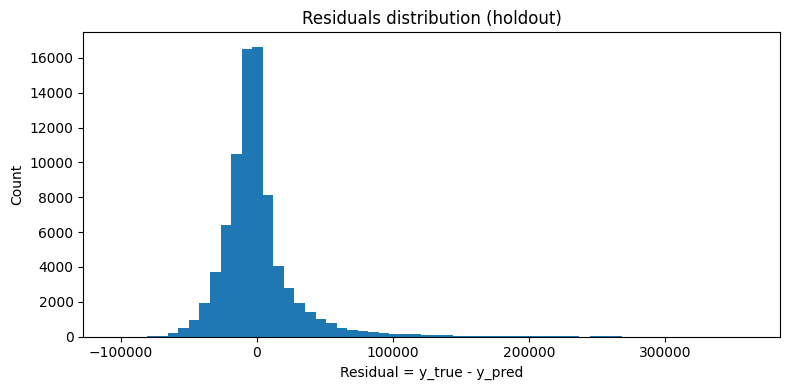

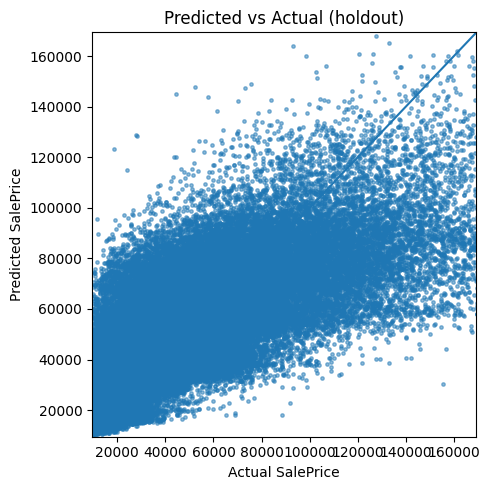

[סיכום #==10==] ביצענו פיצול 80/20, אימנו את ה-Pipeline, וחישבנו RMSE/MAE על holdout.
- תוצאה: RMSE=27,336.56, MAE=17,277.14, זמן אימון=10.2s.
- מצב מהיר: n_estimators=100, max_depth=20, max_samples=0.7, ואימון על 112,315/320,900 רשומות.
- הגרפים עוזרים לזהות הטיות/פערים (רזידואלים והתכנסות לקו 45°).
- זהו קו הבסיס (Baseline). נשתמש בו להשוואה מול ריצות משופרות בהמשך.


In [31]:
#==10==
# -------------------------
# 3) הערכה פנימית: train_test_split → אימון → RMSE/MAE על holdout
#    תלוי ב-#==3==, #==8==, #==9== (לא טוען דאטה מחדש!)
# -------------------------

# תנאי קדם
assert 'pipe' in globals(), "חסר pipe מ-#==9== — הריצי קודם את #==9==."
assert 'train' in globals() and 'label_col' in globals() and 'features_used' in globals(), \
    "חסרים train/label_col/features_used — הריצי קודם את #==3== ואז #==8==."

# יבוא עדין
try:
    train_test_split, mean_squared_error, mean_absolute_error
except NameError:
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np, time
import matplotlib.pyplot as plt

# פרמטרים להאצת הריצה
FAST_EVAL = True
SMOKE_FRACTION = 0.35   # לאימון מהיר; לשימוש מלא שימי 1.0 או FAST_EVAL=False
RANDOM_STATE = 42

# הכנת הנתונים לפיצול (שימי לב: y נשארת Series עם אינדקסים!)
X = train[features_used].copy()
y = train[label_col].copy()   # ← לא .values כדי לשמור אינדקסים

X_tr, X_ho, y_tr, y_ho = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE
)

# מצב מהיר: מקטין עומס המודל + אימון על דגימה
if FAST_EVAL:
    pipe.set_params(
        model__n_estimators=100,
        model__max_depth=20,
        model__max_features="sqrt",
        model__max_samples=0.7,
        model__min_samples_leaf=2,
        model__random_state=RANDOM_STATE,
        model__n_jobs=-1,
        model__verbose=1
    )
    if 0 < SMOKE_FRACTION < 1.0:
        idx = X_tr.sample(frac=SMOKE_FRACTION, random_state=RANDOM_STATE).index
        X_tr_fit = X_tr.loc[idx]
        y_tr_fit = y_tr.loc[idx]   # ← התאמה לפי אינדקסים תואמים
    else:
        X_tr_fit = X_tr
        y_tr_fit = y_tr
else:
    X_tr_fit = X_tr
    y_tr_fit = y_tr

# אימון + חיזוי + מדדים
t0 = time.time()
pipe.fit(X_tr_fit, y_tr_fit)
fit_time = time.time() - t0

y_pred = pipe.predict(X_ho)

# RMSE: תאימות לגרסאות sklearn
try:
    rmse = mean_squared_error(y_ho, y_pred, squared=False)
except TypeError:
    rmse = float(np.sqrt(mean_squared_error(y_ho, y_pred)))

mae  = mean_absolute_error(y_ho, y_pred)

print(f"[RESULT] Holdout RMSE: {rmse:,.2f} | MAE: {mae:,.2f} | fit_time: {fit_time:.1f}s")
print(f"[INFO] Split sizes → train: {len(X_tr):,} | holdout: {len(X_ho):,} | features used: {len(features_used):,}")
if FAST_EVAL:
    print(f"[INFO] FAST_EVAL on: trained on {len(X_tr_fit):,} rows (fraction={len(X_tr_fit)/len(X_tr):.0%})")

# ויזואליזציות קצרות
residuals = y_ho.values - y_pred
fig = plt.figure(figsize=(8,4))
plt.hist(residuals, bins=60)
plt.title("Residuals distribution (holdout)")
plt.xlabel("Residual = y_true - y_pred"); plt.ylabel("Count")
plt.tight_layout(); plt.show()

fig = plt.figure(figsize=(5,5))
y_ho_arr = y_ho.values
plt.scatter(y_ho_arr, y_pred, s=6, alpha=0.5)
min_v = float(np.percentile(np.r_[y_ho_arr, y_pred], 1))
max_v = float(np.percentile(np.r_[y_ho_arr, y_pred], 99))
plt.plot([min_v, max_v], [min_v, max_v])
plt.xlim(min_v, max_v); plt.ylim(min_v, max_v)
plt.title("Predicted vs Actual (holdout)")
plt.xlabel("Actual SalePrice"); plt.ylabel("Predicted SalePrice")
plt.tight_layout(); plt.show()

# סיכום מילולי
summary_lines = []
summary_lines.append("[סיכום #==10==] ביצענו פיצול 80/20, אימנו את ה-Pipeline, וחישבנו RMSE/MAE על holdout.")
summary_lines.append(f"- תוצאה: RMSE={rmse:,.2f}, MAE={mae:,.2f}, זמן אימון={fit_time:.1f}s.")
if FAST_EVAL:
    summary_lines.append(f"- מצב מהיר: n_estimators=100, max_depth=20, max_samples=0.7, "
                         f"ואימון על {len(X_tr_fit):,}/{len(X_tr):,} רשומות.")
else:
    summary_lines.append("- מצב מלא: ללא האצות; אימון על כל סט האימון הפנימי.")
summary_lines.append("- הגרפים עוזרים לזהות הטיות/פערים (רזידואלים והתכנסות לקו 45°).")
summary_lines.append("- זהו קו הבסיס (Baseline). נשתמש בו להשוואה מול ריצות משופרות בהמשך.")
print("\n".join(summary_lines))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


[v2b RESULT] RMSE=16,720.68 | MAE=10,009.83 | fit_time=19.9s
[v2b INFO] split: train=320,900 | holdout=80,225 | features=41
[v2b INFO] trained on 112,315/320,900 rows (35%)


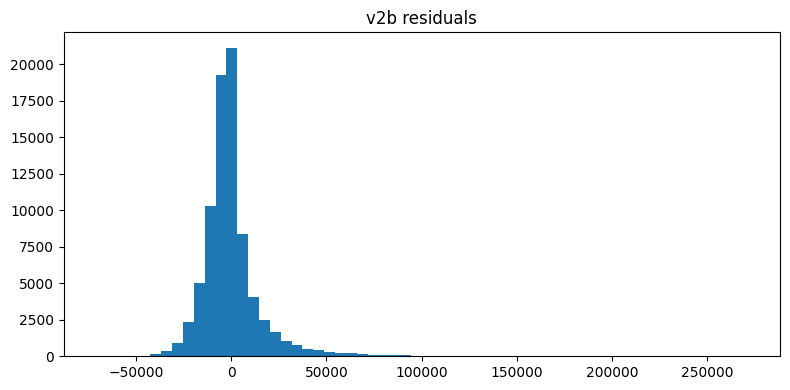

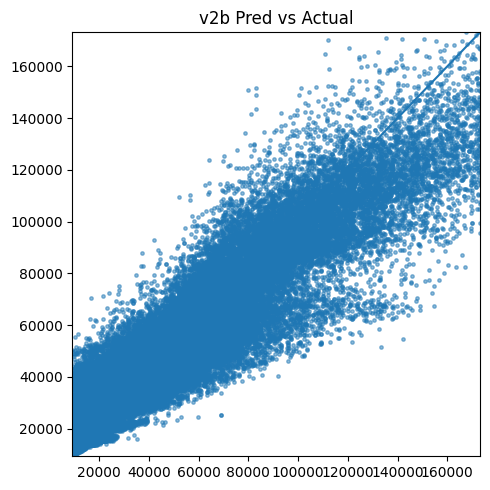

[סיכום #==10b==] בדקנו v2b עם 'state'. נשווה ל-Baseline (#==10==). אם טוב/קרוב → נריץ #==11b== להגשה.


In [32]:
#==10b==

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np, time, matplotlib.pyplot as plt

assert all(v in globals() for v in ['pipe_v2b','train','label_col','features_used_v2b'])

RANDOM_STATE = 42
FAST_EVAL = True
SMOKE_FRACTION = 0.35

X = train[features_used_v2b].copy()
y = train[label_col].copy()

X_tr, X_ho, y_tr, y_ho = train_test_split(X, y, test_size=0.20, random_state=RANDOM_STATE)

if FAST_EVAL and 0 < SMOKE_FRACTION < 1.0:
    idx = X_tr.sample(frac=SMOKE_FRACTION, random_state=RANDOM_STATE).index
    X_fit, y_fit = X_tr.loc[idx], y_tr.loc[idx]
else:
    X_fit, y_fit = X_tr, y_tr

t0 = time.time(); pipe_v2b.fit(X_fit, y_fit); fit_time = time.time()-t0
y_pred = pipe_v2b.predict(X_ho)

try: rmse_v2b = mean_squared_error(y_ho, y_pred, squared=False)
except TypeError: rmse_v2b = float(np.sqrt(mean_squared_error(y_ho, y_pred)))
mae_v2b = mean_absolute_error(y_ho, y_pred)

print(f"[v2b RESULT] RMSE={rmse_v2b:,.2f} | MAE={mae_v2b:,.2f} | fit_time={fit_time:.1f}s")
print(f"[v2b INFO] split: train={len(X_tr):,} | holdout={len(X_ho):,} | features={len(features_used_v2b)}")
if FAST_EVAL:
    print(f"[v2b INFO] trained on {len(X_fit):,}/{len(X_tr):,} rows ({len(X_fit)/len(X_tr):.0%})")

# גרפים קצרים
res = y_ho.values - y_pred
plt.figure(figsize=(8,4)); plt.hist(res, bins=60); plt.title("v2b residuals"); plt.tight_layout(); plt.show()
plt.figure(figsize=(5,5))
min_v = float(np.percentile(np.r_[y_ho.values, y_pred], 1))
max_v = float(np.percentile(np.r_[y_ho.values, y_pred], 99))
plt.scatter(y_ho, y_pred, s=6, alpha=0.5); plt.plot([min_v,max_v],[min_v,max_v])
plt.xlim(min_v,max_v); plt.ylim(min_v,max_v); plt.title("v2b Pred vs Actual"); plt.tight_layout(); plt.show()

print("[סיכום #==10b==] בדקנו v2b עם 'state'. נשווה ל-Baseline (#==10==). אם טוב/קרוב → נריץ #==11b== להגשה.")


[v2c_rf_strong] REAL$   RMSE=15,708 | MAE=9,455 | trained on 112,315/320,900 rows in 172.4s | features=46
[v2c_rf_strong] NOMINAL RMSE=11,964 | MAE=7,458


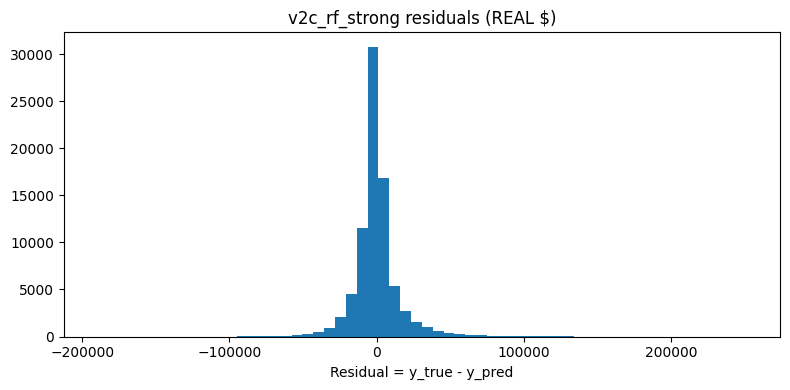

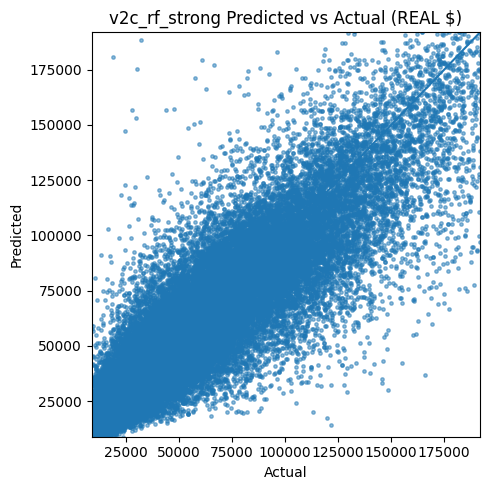

[סיכום #==10c==] REAL metrics printed above; NOMINAL printed if CPI helpers were available.


In [33]:
#==10c==
# -------------------------
# RF eval (80/20) on REAL dollars (BasePrice) + inflate to NOMINAL if CPI helpers exist
# Works with pipe_v2c_rf_strong (or ACTIVE_PIPE set by #==9c_select==)
# -------------------------

import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

# ---- Resolve active model/name/features ----
# Prefer the explicit selection from #==9c_select==; fall back to pipe_v2c_rf_strong if present.
if 'ACTIVE_PIPE' not in globals() and 'pipe_v2c_rf_strong' in globals():
    ACTIVE_PIPE = pipe_v2c_rf_strong
if 'ACTIVE_NAME' not in globals():
    ACTIVE_NAME = 'v2c_rf_strong' if 'pipe_v2c_rf_strong' in globals() else 'model'

MODEL = globals().get('ACTIVE_PIPE', None)
NAME  = globals().get('ACTIVE_NAME', 'v2c_rf_strong')

assert MODEL is not None, "Missing ACTIVE_PIPE. Run #==9c_rf_strong== (and optionally #==9c_select==) first."
assert 'train' in globals(), "Missing 'train'. Run #==3== / #==3d== to load and prepare data."
assert 'label_col' in globals(), "Missing 'label_col'. After #==3d== it should be 'BasePrice' (recommended)."

SALEDATE_COL = globals().get('SALEDATE_COL', 'saledate')
assert SALEDATE_COL in train.columns, f"Expected sale-date column '{SALEDATE_COL}' in train."

# ---- Safety: strip any forbidden target columns if they slipped into the ColumnTransformer ----
FORBIDDEN = {'BasePrice', 'SalePrice', str(globals().get('label_col', 'BasePrice'))}

def _strip_forbidden_from_pipe(pipe):
    pre = pipe.named_steps.get('preprocess', None)
    if pre is None:
        return pipe
    new_transformers = []
    for name, trans, cols in pre.transformers:
        if isinstance(cols, list):
            cols = [c for c in cols if c not in FORBIDDEN]
        new_transformers.append((name, trans, cols))
    pre.transformers = new_transformers
    return pipe

MODEL = _strip_forbidden_from_pipe(MODEL)

# ---- Build input columns by introspecting the pipeline (so FE can create what preprocess expects) ----
REQUIRED_BASE = {SALEDATE_COL, 'YearMade', 'MachineHoursCurrentMeter'}

# ProductSizeOrdinal raw col
if 'size_ord' in MODEL.named_steps:
    ps_col = getattr(MODEL.named_steps['size_ord'], 'col', None)
    if ps_col:
        REQUIRED_BASE.add(ps_col)

# CategoryCountsEncoder raw cols (e.g., ModelID, auctioneerID, ...)
if 'catcount' in MODEL.named_steps:
    freq_cols = getattr(MODEL.named_steps['catcount'], 'cols', []) or []
    for c in freq_cols:
        if c in train.columns:
            REQUIRED_BASE.add(c)

# RareFlagEncoder raw cols (e.g., ModelID)
if 'rareflag' in MODEL.named_steps:
    rare_cols = getattr(MODEL.named_steps['rareflag'], 'cols', []) or []
    for c in rare_cols:
        if c in train.columns:
            REQUIRED_BASE.add(c)

# Categorical raw cols used by the ColumnTransformer
pre = MODEL.named_steps.get('preprocess', None)
if pre is not None:
    for name, trans, cols in pre.transformers:
        if name == 'cat' and isinstance(cols, list):
            for c in cols:
                if c in train.columns:
                    REQUIRED_BASE.add(c)

# Optionally merge with curated feature list if you keep one
ACTIVE_FEATURES = globals().get('ACTIVE_FEATURES', globals().get('features_used_v2c', globals().get('features_used', [])))
INPUT_COLS_10C = sorted(set([c for c in (ACTIVE_FEATURES or []) if c in train.columns] +
                            [c for c in REQUIRED_BASE if c in train.columns]))
assert len(INPUT_COLS_10C) > 0, "No usable input columns. Check #==8c== / #==9c_rf_strong==."

# ---- Data & split ----
X = train[INPUT_COLS_10C].copy()
y = train[label_col].copy()

X_tr, X_ho, y_tr, y_ho = train_test_split(X, y, test_size=0.20, random_state=42)

# Optional fast mode to keep fits snappy
FAST_EVAL = globals().get('FAST_EVAL', True)
SMOKE_FRACTION = globals().get('SMOKE_FRACTION', 0.35)

if FAST_EVAL and len(X_tr) > 1000:
    rs = np.random.RandomState(42)
    idx = rs.choice(len(X_tr), size=int(len(X_tr) * SMOKE_FRACTION), replace=False)
    X_fit = X_tr.iloc[idx]
    y_fit = y_tr.iloc[idx]
else:
    X_fit = X_tr
    y_fit = y_tr

# ---- Fit ----
t0 = time.time()
MODEL.fit(X_fit, y_fit)
fit_time = time.time() - t0

# ---- Predict on holdout (REAL $) ----
y_pred_real = MODEL.predict(X_ho)
y_ho_real = y_ho.values

# -------- REAL-$ metrics --------
rmse_real = float(np.sqrt(mean_squared_error(y_ho_real, y_pred_real)))
mae_real = float(mean_absolute_error(y_ho_real, y_pred_real))
print(
    f"[{NAME}] REAL$   RMSE={rmse_real:,.0f} | MAE={mae_real:,.0f} | "
    f"trained on {len(X_fit):,}/{len(X_tr):,} rows in {fit_time:.1f}s | features={len(INPUT_COLS_10C)}"
)

# Expose holdout for #==11c== permutation importance (re-use)
X_ho = X_ho.copy()
y_ho = y_ho.copy()

# -------- NOMINAL-$ metrics (inflate both truth & preds using holdout sale dates), if CPI helpers exist --------
have_cpi = ('inflator' in globals()) and ('CPI_BASE_MONTH' in globals())
if have_cpi:
    ho_dates = X_ho[[SALEDATE_COL]].copy()

    pred_df = ho_dates.copy()
    pred_df["y_pred_real"] = y_pred_real
    pred_df = inflator(
        pred_df,
        sale_date_col=SALEDATE_COL,
        real_price_col="y_pred_real",
        base_month=CPI_BASE_MONTH,
        new_col="y_pred_nominal"
    )

    true_df = ho_dates.copy()
    true_df["y_true_real"] = y_ho_real
    true_df = inflator(
        true_df,
        sale_date_col=SALEDATE_COL,
        real_price_col="y_true_real",
        base_month=CPI_BASE_MONTH,
        new_col="y_true_nominal"
    )

    y_pred_nominal = pred_df["y_pred_nominal"].values
    y_true_nominal = true_df["y_true_nominal"].values

    rmse_nom = float(np.sqrt(mean_squared_error(y_true_nominal, y_pred_nominal)))
    mae_nom = float(mean_absolute_error(y_true_nominal, y_pred_nominal))
    print(f"[{NAME}] NOMINAL RMSE={rmse_nom:,.0f} | MAE={mae_nom:,.0f}")
else:
    print(f"[{NAME}] (Skipping NOMINAL metrics; CPI helpers not found — run #==3c== to define inflator/CPI_BASE_MONTH.)")

# -------- Quick plots (REAL $) --------
res = y_ho_real - y_pred_real
plt.figure(figsize=(8, 4))
plt.hist(res, bins=60)
plt.title(f"{NAME} residuals (REAL $)")
plt.xlabel("Residual = y_true - y_pred")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
min_v = float(np.percentile(np.r_[y_ho_real, y_pred_real], 1))
max_v = float(np.percentile(np.r_[y_ho_real, y_pred_real], 99))
plt.scatter(y_ho_real, y_pred_real, s=6, alpha=0.5)
plt.plot([min_v, max_v], [min_v, max_v])
plt.xlim(min_v, max_v)
plt.ylim(min_v, max_v)
plt.title(f"{NAME} Predicted vs Actual (REAL $)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()

print("[סיכום #==10c==] REAL metrics printed above; NOMINAL printed if CPI helpers were available.")


NameError: name 'features_used_v2c' is not defined

In [34]:
#==11==
# -------------------------
# Full fit + VALID prediction + submission (RF-only friendly)
# Self-contained: no SELECT_ACTIVE needed.
# If the model is trained on BasePrice (real $), we inflate predictions to SalePrice (nominal).
# -------------------------

import os, numpy as np, pandas as pd
from datetime import datetime

# ---------- Resolve ACTIVE_* safely ----------
# Choose the pipeline to use (priority order)
"""
ACTIVE_PIPE = globals().get(
    'ACTIVE_PIPE',
    globals().get('pipe_v2c_rf_best',      # if you ran 9d search later
    globals().get('pipe_v2c_rf_strong',    # our RF-only pipeline
    globals().get('pipe_v2c',              # optional fallback if you still keep 9c
    globals().get('pipe', None)))))


assert ACTIVE_PIPE is not None, "לא נמצא מודל. הרץ #==9c_rf_strong== או #==9c== לבניית פייפליין."
"""
# Prefer RF-only pipeline and require it
ACTIVE_PIPE = globals().get('pipe_v2c_rf_strong', None)
assert ACTIVE_PIPE is not None, "Run #==9c_rf_strong== first to build the RF pipeline."
ACTIVE_VERSION = 'v2c_rf_strong'

# (optional) speed knob for full-fit in submissions
FAST_SUBMIT = globals().get('FAST_SUBMIT', True)
if FAST_SUBMIT:
    try:
        ACTIVE_PIPE.set_params(model__n_estimators=400, model__max_samples=0.70)
    except Exception:
        pass


# Version tag (for file names)
if 'ACTIVE_VERSION' not in globals():
    if 'pipe_v2c_rf_strong' in globals():
        ACTIVE_VERSION = 'v2c_rf_strong'
    elif 'pipe_v2c' in globals():
        ACTIVE_VERSION = 'v2c'
    elif 'pipe' in globals():
        ACTIVE_VERSION = 'baseline'
    else:
        ACTIVE_VERSION = 'model'

# Data preconditions
assert 'train' in globals() and 'valid' in globals(), "חסרים train/valid. ודא שטענת את הקבצים (#==3==)."

# Label/ID/date columns
SALEDATE_COL     = globals().get('SALEDATE_COL', 'saledate')
ACTIVE_LABEL_COL = globals().get('label_col', 'BasePrice')  # by #==3d== this should be 'BasePrice'
ID_CANDIDATES    = ['SalesID','SaleID','MachineID','ID','id','machineID']
ACTIVE_ID_COL    = next((c for c in ID_CANDIDATES if c in valid.columns), None)
assert ACTIVE_ID_COL is not None, f"לא נמצא מזהה בקובץ valid. חסרה אחת מהעמודות: {ID_CANDIDATES}"
assert SALEDATE_COL in valid.columns, f"עמודת תאריך מכירה '{SALEDATE_COL}' חסרה ב-valid (הוגדרה ב-#==3d==)."

# ---------- Build ACTIVE_INPUT_COLS by introspecting the pipeline ----------
REQUIRED_BASE = {SALEDATE_COL, 'YearMade', 'MachineHoursCurrentMeter'}

# If ProductSizeOrdinal is present, include its raw column
if 'size_ord' in ACTIVE_PIPE.named_steps:
    ps_col = getattr(ACTIVE_PIPE.named_steps['size_ord'], 'col', None)
    if ps_col:
        REQUIRED_BASE.add(ps_col)

# Frequency encoder needs raw columns (e.g., ModelID, auctioneerID, ...)
if 'catcount' in ACTIVE_PIPE.named_steps:
    freq_cols = getattr(ACTIVE_PIPE.named_steps['catcount'], 'cols', []) or []
    for c in freq_cols:
        if c in train.columns:
            REQUIRED_BASE.add(c)

# Categorical raw columns used by the ColumnTransformer
pre = ACTIVE_PIPE.named_steps.get('preprocess', None)
if pre is not None:
    for name, trans, cols in pre.transformers:
        if name == 'cat' and isinstance(cols, list):
            for c in cols:
                if c in train.columns:
                    REQUIRED_BASE.add(c)

# Optional feature list (if you keep curated features)
ACTIVE_FEATURES = globals().get('ACTIVE_FEATURES',
                     globals().get('features_used_v2c',
                     globals().get('features_used', [])))

ACTIVE_INPUT_COLS = sorted(set(
    [c for c in (ACTIVE_FEATURES or []) if c in train.columns] +
    [c for c in REQUIRED_BASE if c in train.columns]
))
assert ACTIVE_INPUT_COLS, "ACTIVE_INPUT_COLS יצא ריק. בדוק את רשימות הפיצ'רים ואת שמות העמודות."

print(f"[#==11==] Using pipeline: {ACTIVE_VERSION}")
print(f"[#==11==] Inputs: {len(ACTIVE_INPUT_COLS)} cols | Label: {ACTIVE_LABEL_COL} | ID: {ACTIVE_ID_COL}")

# ---------- 1) Full training on Train ----------
X_full = train[ACTIVE_INPUT_COLS].copy()
y_full = train[ACTIVE_LABEL_COL].copy()
ACTIVE_PIPE.fit(X_full, y_full)

# ---------- 2) Predict on VALID ----------
X_valid = valid[ACTIVE_INPUT_COLS].copy()
pred_real = np.maximum(ACTIVE_PIPE.predict(X_valid), 0)  # avoid negative

# If training was on BasePrice (real $), inflate to nominal SalePrice using VALID dates
will_inflate = (ACTIVE_LABEL_COL.lower() == 'baseprice') and all(k in globals() for k in ['inflator','CPI_BASE_MONTH'])
if will_inflate:
    tmp = valid[[SALEDATE_COL]].copy()
    tmp['y_pred_real'] = pred_real
    tmp = inflator(tmp, sale_date_col=SALEDATE_COL, real_price_col='y_pred_real',
                   base_month=CPI_BASE_MONTH, new_col='SalePrice')
    pred_nominal = tmp['SalePrice'].values
else:
    # assume model already predicts nominal prices
    pred_nominal = pred_real

# ---------- 3) Build submission ----------
sub_df = pd.DataFrame({
    "SalesID":  valid[ACTIVE_ID_COL].values,
    "SalePrice": pred_nominal
})

# Basic validations
assert len(sub_df) == len(valid), "אורך קובץ ההגשה לא תואם את VALID."
assert sub_df["SalesID"].isna().sum() == 0, "יש NaN בעמודת SalesID."
assert sub_df["SalesID"].duplicated().sum() == 0, "יש כפילויות ב-SalesID."

# ---------- 4) Save to disk ----------
os.makedirs("submissions", exist_ok=True)
ts = datetime.now().strftime("%Y%m%d_%H%M")
ACTIVE_SUB_PATH = f"submissions/submission_{ACTIVE_VERSION}_{ts}.csv"
sub_df.to_csv(ACTIVE_SUB_PATH, index=False, encoding="utf-8-sig")

# ---------- 5) (optional) Save the fitted pipeline ----------
saved_model_msg = ""
try:
    import joblib, os
    os.makedirs("models", exist_ok=True)
    ACTIVE_MODEL_PATH = f"models/{ACTIVE_VERSION}_{ts}.joblib"
    joblib.dump(ACTIVE_PIPE, ACTIVE_MODEL_PATH)
    saved_model_msg = f"[OK] saved model → {ACTIVE_MODEL_PATH}"
except Exception as e:
    saved_model_msg = f"[WARN] model not saved ({e})"

# ---------- 6) Display & summary ----------
print(f"[OK] submission written → {ACTIVE_SUB_PATH}")
print(f"[INFO] rows in submission: {len(sub_df):,} (should equal len(Valid)={len(valid):,})")
display(sub_df.head(10))

print(f"[STATS] preds: mean={sub_df['SalePrice'].mean():,.2f} | median={sub_df['SalePrice'].median():,.2f} "
      f"| min={sub_df['SalePrice'].min():,.2f} | max={sub_df['SalePrice'].max():,.2f}")
print(saved_model_msg)

print(f"[סיכום #==11==] אימנו את '{ACTIVE_VERSION}' על כל ה-Train, חיזינו את Valid ויצרנו קובץ הגשה מוכן (נשמר למעלה).")


[#==11==] Using pipeline: v2c_rf_strong
[#==11==] Inputs: 46 cols | Label: BasePrice | ID: SalesID


KeyError: "['SalePrice'] not in index"

In [36]:
#==12==

import os, pandas as pd
from datetime import datetime

assert 'ACTIVE_SUB_PATH' in globals(), "חסר ACTIVE_SUB_PATH — הריצי קודם את #==11==."

row = {
    "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M"),
    "version": ACTIVE_VERSION,
    "features_used": len(ACTIVE_FEATURES),
    "fast_eval": True,  # אם השתמשת ב-#==10c== מהיר לפני; אינפורמטיבי בלבד
    "n_estimators": getattr(ACTIVE_PIPE['model'], 'n_estimators', None),
    "max_depth": getattr(ACTIVE_PIPE['model'], 'max_depth', None),
    "max_samples": getattr(ACTIVE_PIPE['model'], 'max_samples', None),
    "min_samples_leaf": getattr(ACTIVE_PIPE['model'], 'min_samples_leaf', None),
    "holdout_rmse": (f"{ACTIVE_RMSE:,.2f}" if ( 'ACTIVE_RMSE' in globals() and ACTIVE_RMSE is not None) else ""),
    "holdout_mae":  (f"{ACTIVE_MAE:,.2f}"  if ( 'ACTIVE_MAE'  in globals() and ACTIVE_MAE  is not None) else ""),
    "submission_path": ACTIVE_SUB_PATH
}

os.makedirs("experiments", exist_ok=True)
log_path = "experiments/experiments_log.csv"
if os.path.exists(log_path):
    df = pd.read_csv(log_path)
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)
else:
    df = pd.DataFrame([row])
df.to_csv(log_path, index=False, encoding="utf-8-sig")
print("[OK] experiments log updated →", log_path)
display(df.tail(3))


AssertionError: חסר ACTIVE_SUB_PATH — הריצי קודם את #==11==.

,feature,importance
2,num__YearMade,0.10
1,num__ModelID,0.10
76,cat__ProductGroup_SSL,0.05
38,cat__Enclosure_EROPS w AC,0.05
82,cat__ProductGroupDesc_Skid Steer Loaders,0.04
0,num__MachineID,0.04
229,cat__datasource_132,0.04
88,cat__ProductSize_Large / Medium,0.04
40,cat__Enclosure_OROPS,0.04
90,cat__ProductSize_Mini,0.03


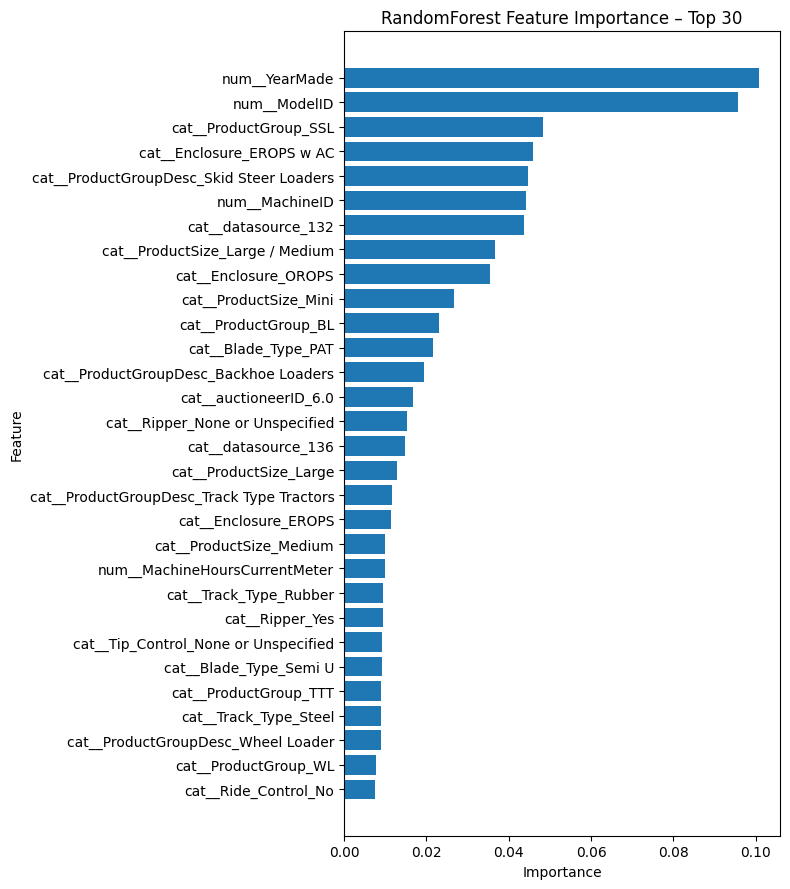

[סיכום #==13==] הצגנו את 30 הפיצ'רים המשפיעים ביותר לפי היער. בגרסאות הבאות נשווה לכאן אחרי ניקוי/הנדסת פיצ'רים.


In [37]:
#==13==

# -------------------------
# Feature Importance (Top 30) מהיער המאומן
# הערה: שמות הפיצ'רים אחרי OHE מתקבלים מה-ColumnTransformer אם נתמך בגרסה.
# -------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

assert 'pipe' in globals(), "חסר pipe מאומן"

model = pipe.named_steps["model"]
pre   = pipe.named_steps["preprocess"]

# ניסיון לקבל שמות פיצ'רים מלאים מה-Preprocessor
feature_names = None
try:
    feature_names = pre.get_feature_names_out()
except Exception:
    # נפוץ בגרסאות ישנות: ננסה לבנות שמות בסיסיים לפי אורך הוקטור
    try:
        n = len(model.feature_importances_)
        feature_names = np.array([f"f_{i}" for i in range(n)])
    except Exception:
        feature_names = None

# בניית טבלת חשיבות
fi = np.array(model.feature_importances_)
fi_df = pd.DataFrame({
    "feature": feature_names if feature_names is not None else np.arange(len(fi)),
    "importance": fi
}).sort_values("importance", ascending=False)

display(fi_df.head(30))

# גרף Top 30
topn = fi_df.head(30).sort_values("importance")
fig = plt.figure(figsize=(8, max(5, 0.3*len(topn))))
plt.barh(topn["feature"], topn["importance"])
plt.title("RandomForest Feature Importance – Top 30")
plt.xlabel("Importance"); plt.ylabel("Feature")
plt.tight_layout(); plt.show()

# סיכום קצר
print("[סיכום #==13==] הצגנו את 30 הפיצ'רים המשפיעים ביותר לפי היער. "
      "בגרסאות הבאות נשווה לכאן אחרי ניקוי/הנדסת פיצ'רים.")


In [38]:
# === FULL SNIPPET: Inspect engineered features + Feature Importance (v2c) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Preconditions from your notebook ---
assert 'train' in globals(), "דרוש DataFrame בשם `train`."
assert 'DateAgeAdder' in globals(), "חסר המחלקה DateAgeAdder (#==9c==)."
assert 'pipe_v2c' in globals(), "חסר הפייפליין pipe_v2c (#==9c==)."
assert 'features_used_v2c' in globals(), "חסרות רשימות הפיצ'רים מ-#==9c==."
if 'label_col' not in globals():
    label_col = 'SalePrice'  # ברירת מחדל, התאימי אם אתם עובדים על BasePrice

# --------------------------------------------------------------------------
# A) הצגת כל הפיצ'רים החדשים שנוצרים ע"י DateAgeAdder (איתור אוטומטי)
# --------------------------------------------------------------------------
need = ['saledate','YearMade','MachineHoursCurrentMeter']
avail = [c for c in need if c in train.columns]
df_in = train[avail].copy()

adder = DateAgeAdder()
df_new = adder.transform(df_in)

new_cols = [c for c in df_new.columns if c not in df_in.columns]  # איתור אוטומטי
print("=== New engineered features detected by DateAgeAdder ===")
print(new_cols)

# תצוגת דוגמה + סטטיסטיקות תמצית
print("\n--- Preview (first 10 rows) ---")
print(df_new[new_cols].head(10).to_string(index=False))

print("\n--- Summary (count/mean/median/std/min/max) ---")
summary = df_new[new_cols].agg(["count","mean","median","std","min","max"]).T
print(summary.to_string())

# --------------------------------------------------------------------------
# B) Feature Importance מתוך pipe_v2c (עם שמות אחרי ה-Preprocess/OHE)
#     אם הפייפליין עוד לא אותחל על הנתונים – נבצע fit מהיר ועקבי (log1p)
# --------------------------------------------------------------------------
# הכנת X,y
X = train[features_used_v2c].copy()
y_raw = pd.to_numeric(train[label_col], errors='coerce')
mask = y_raw.notna()
X = X.loc[mask]
y_raw = y_raw.loc[mask]

# עקביות עם המדדים לוגאריתמיים במחברת שלכם
y = np.log1p(y_raw.clip(lower=0))

# אימון מהיר (אם כבר אימנת – זה פשוט יתאמן שוב)
pipe_v2c.fit(X, y)

# חילוץ שמות פיצ'רים אחרי ה-Preprocess (כולל OHE)
pre = pipe_v2c.named_steps["preprocess"]

def _safe_get_feature_names(pre):
    # ניסיון ישיר (sklearn>=1.0)
    try:
        return pre.get_feature_names_out()
    except Exception:
        pass
    # ניסיון דרך ה-OneHotEncoder
    num_names = list(pre.transformers_[0][2]) if len(pre.transformers_)>=1 else []
    cat_names = list(pre.transformers_[1][2]) if len(pre.transformers_)>=2 else []
    names = list(num_names)
    try:
        ohe = pre.named_transformers_['cat'].named_steps['onehot']
        try:
            cat_out = ohe.get_feature_names_out(cat_names).tolist()
        except Exception:
            # גרסאות ישנות: נבנה ידנית
            cat_out = []
            cats = getattr(ohe, "categories_", None)
            if cats is not None:
                for feat, cat_vals in zip(cat_names, cats):
                    cat_out += [f"{feat}={val}" for val in cat_vals]
        names += cat_out
    except Exception:
        # אם אין טרנספורמר קטגוריאלי
        names += cat_names
    return np.array(names)

feat_names = _safe_get_feature_names(pre)

importances = pipe_v2c.named_steps["model"].feature_importances_
fi = pd.DataFrame({"feature": feat_names, "importance": importances}) \
       .sort_values("importance", ascending=False)

print("\n=== Top 25 Feature Importances (v2c) ===")
print(fi.head(25).to_string(index=False))

# דגש: חשיבויות רק של הפיצ'רים החדשים (אם קיימים בשמות אחרי ה-Preprocess)
fi_new = fi[fi["feature"].isin(new_cols)]
print("\n=== Importances for engineered features only ===")
if not fi_new.empty:
    print(fi_new.sort_values("importance", ascending=False).to_string(index=False))
else:
    print("(no engineered-feature names found in post-preprocess features)")

# גרף קטן: 15 החשובים ביותר (מציג על המסך)
plt.figure(figsize=(8,4))
top = fi.head(15).iloc[::-1]
plt.barh(top["feature"], top["importance"])
plt.title("Top 15 Feature Importances (v2c)")
plt.tight_layout()
plt.show()


AssertionError: חסר הפייפליין pipe_v2c (#==9c==).

In [41]:
# === FULL SNIPPET: Inspect engineered features + Feature Importance (v2c) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Preconditions from your notebook ---
assert 'train' in globals(), "דרוש DataFrame בשם `train`."
assert 'DateAgeAdder' in globals(), "חסר המחלקה DateAgeAdder (#==9c==)."
assert 'pipe_v2c' in globals(), "חסר הפייפליין pipe_v2c (#==9c==)."
assert 'features_used_v2c' in globals(), "חסרות רשימות הפיצ'רים מ-#==9c==."
if 'label_col' not in globals():
    label_col = 'SalePrice'  # ברירת מחדל, התאימי אם אתם עובדים על BasePrice

# --------------------------------------------------------------------------
# A) הצגת כל הפיצ'רים החדשים שנוצרים ע"י DateAgeAdder (איתור אוטומטי)
# --------------------------------------------------------------------------
need = ['saledate','YearMade','MachineHoursCurrentMeter']
avail = [c for c in need if c in train.columns]
df_in = train[avail].copy()

adder = DateAgeAdder()
df_new = adder.transform(df_in)

new_cols = [c for c in df_new.columns if c not in df_in.columns]  # איתור אוטומטי
print("=== New engineered features detected by DateAgeAdder ===")
print(new_cols)

# תצוגת דוגמה + סטטיסטיקות תמצית
print("\n--- Preview (first 10 rows) ---")
print(df_new[new_cols].head(10).to_string(index=False))

print("\n--- Summary (count/mean/median/std/min/max) ---")
summary = df_new[new_cols].agg(["count","mean","median","std","min","max"]).T
print(summary.to_string())

# --------------------------------------------------------------------------
# B) Feature Importance מתוך pipe_v2c (עם שמות אחרי ה-Preprocess/OHE)
#     אם הפייפליין עוד לא אותחל על הנתונים – נבצע fit מהיר ועקבי (log1p)
# --------------------------------------------------------------------------
# הכנת X,y
X = train[features_used_v2c].copy()
y_raw = pd.to_numeric(train[label_col], errors='coerce')
mask = y_raw.notna()
X = X.loc[mask]
y_raw = y_raw.loc[mask]

# עקביות עם המדדים לוגאריתמיים במחברת שלכם
y = np.log1p(y_raw.clip(lower=0))

# אימון מהיר (אם כבר אימנת – זה פשוט יתאמן שוב)
pipe_v2c.fit(X, y)

# חילוץ שמות פיצ'רים אחרי ה-Preprocess (כולל OHE)
pre = pipe_v2c.named_steps["preprocess"]

def _safe_get_feature_names(pre):
    # ניסיון ישיר (sklearn>=1.0)
    try:
        return pre.get_feature_names_out()
    except Exception:
        pass
    # ניסיון דרך ה-OneHotEncoder
    num_names = list(pre.transformers_[0][2]) if len(pre.transformers_)>=1 else []
    cat_names = list(pre.transformers_[1][2]) if len(pre.transformers_)>=2 else []
    names = list(num_names)
    try:
        ohe = pre.named_transformers_['cat'].named_steps['onehot']
        try:
            cat_out = ohe.get_feature_names_out(cat_names).tolist()
        except Exception:
            # גרסאות ישנות: נבנה ידנית
            cat_out = []
            cats = getattr(ohe, "categories_", None)
            if cats is not None:
                for feat, cat_vals in zip(cat_names, cats):
                    cat_out += [f"{feat}={val}" for val in cat_vals]
        names += cat_out
    except Exception:
        # אם אין טרנספורמר קטגוריאלי
        names += cat_names
    return np.array(names)

feat_names = _safe_get_feature_names(pre)

importances = pipe_v2c.named_steps["model"].feature_importances_
fi = pd.DataFrame({"feature": feat_names, "importance": importances}) \
       .sort_values("importance", ascending=False)

print("\n=== Top 25 Feature Importances (v2c) ===")
print(fi.head(25).to_string(index=False))

# דגש: חשיבויות רק של הפיצ'רים החדשים (אם קיימים בשמות אחרי ה-Preprocess)
fi_new = fi[fi["feature"].isin(new_cols)]
print("\n=== Importances for engineered features only ===")
if not fi_new.empty:
    print(fi_new.sort_values("importance", ascending=False).to_string(index=False))
else:
    print("(no engineered-feature names found in post-preprocess features)")

# גרף קטן: 15 החשובים ביותר (מציג על המסך)
plt.figure(figsize=(8,4))
top = fi.head(15).iloc[::-1]
plt.barh(top["feature"], top["importance"])
plt.title("Top 15 Feature Importances (v2c)")
plt.tight_layout()
plt.show()


AssertionError: חסר הפייפליין pipe_v2c (#==9c==).

In [42]:
# Show only the newly engineered features from DateAgeAdder
import pandas as pd

assert 'train' in globals(), "need a DataFrame named `train`"
assert 'DateAgeAdder' in globals(), "define DateAgeAdder first (cell #==9c==)"

need = ['saledate', 'YearMade', 'MachineHoursCurrentMeter']
cols = [c for c in need if c in train.columns]
df_in = train[cols].copy()

adder = DateAgeAdder()
df_new = adder.transform(df_in)

new_cols = [c for c in df_new.columns if c not in df_in.columns]
print("New engineered columns:", new_cols)

# quick preview
display(df_new[new_cols].head(10))


New engineered columns: ['sale_year', 'sale_month', 'sale_quarter', 'sale_season', 'YearMade_fixed', 'AgeYears', 'hours_is_missing', 'HoursPerYear', 'log_HoursPerYear', 'AgeYears2', 'Age_x_logHPY', 'is_old_machine', 'is_new']


,sale_year,sale_month,sale_quarter,sale_season,YearMade_fixed,AgeYears,hours_is_missing,HoursPerYear,log_HoursPerYear,AgeYears2,Age_x_logHPY,is_old_machine,is_new
0,2006,11,4,Autumn,"2,004.00",2.00,0,34.00,3.56,4.00,7.11,0,0
1,2004,3,1,Spring,"1,996.00",8.00,0,580.00,6.36,64.00,50.92,0,0
2,2004,2,1,Winter,"2,001.00",3.00,0,946.00,6.85,9.00,20.56,0,0
3,2011,5,2,Spring,"2,001.00",10.00,0,348.60,5.86,100.00,58.57,0,0
4,2009,7,3,Summer,"2,007.00",2.00,0,361.00,5.89,4.00,11.78,0,0
5,2008,12,4,Winter,"2,004.00",4.00,0,127.00,4.85,16.00,19.41,0,0
6,2004,8,3,Summer,"1,993.00",11.00,0,"1,049.09",6.96,121.00,76.52,0,0
7,2005,11,4,Autumn,"2,001.00",4.00,0,"1,220.75",7.11,16.00,28.43,0,0
8,2009,8,3,Summer,"2,008.00",1.00,0,302.00,5.71,1.00,5.71,0,1
9,2007,8,3,Summer,NaN,NaN,0,"6,291.04",8.75,NaN,NaN,0,0


,New Feature
0,sale_year
1,sale_month
2,sale_quarter
3,sale_season
4,YearMade_fixed
5,AgeYears
6,hours_is_missing
7,HoursPerYear
8,log_HoursPerYear
9,AgeYears2


Copied to clipboard.


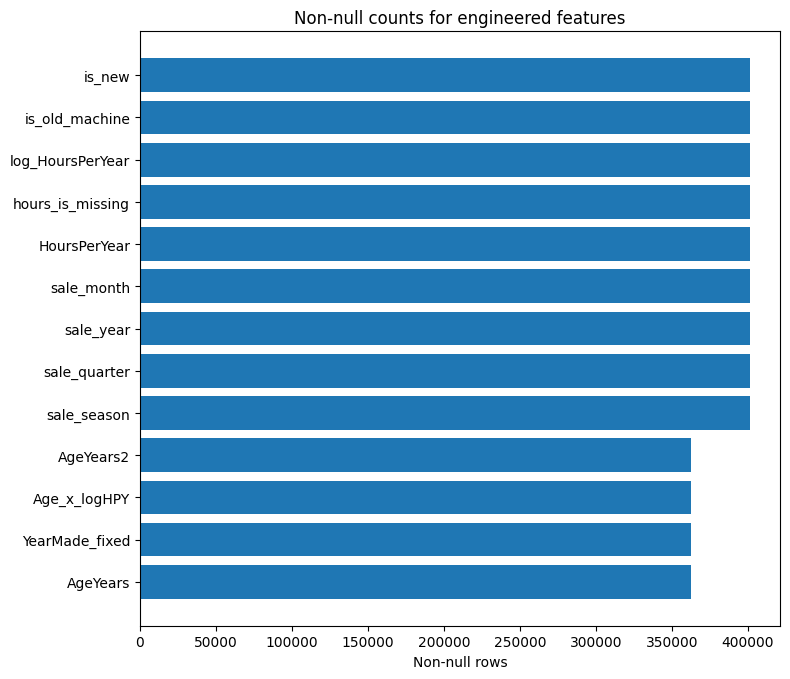

• sale_year
• sale_month
• sale_quarter
• sale_season
• YearMade_fixed
• AgeYears
• hours_is_missing
• HoursPerYear
• log_HoursPerYear
• AgeYears2
• Age_x_logHPY
• is_old_machine
• is_new


In [43]:
# === רשימת הפיצ'רים החדשים (בעמודה אחת) + גרף Bar פשוט ===
import pandas as pd
import matplotlib.pyplot as plt

assert 'train' in globals(), "צריך DataFrame בשם train"
assert 'DateAgeAdder' in globals(), "צריך את המחלקה DateAgeAdder (#==9c==)"

# קלט מינימלי ל-DateAgeAdder
need = ['saledate','YearMade','MachineHoursCurrentMeter']
cols = [c for c in need if c in train.columns]
df_in = train[cols].copy()

# הפקה ואיתור אוטומטי של הפיצ'רים החדשים
adder = DateAgeAdder()
df_new = adder.transform(df_in)
new_cols = [c for c in df_new.columns if c not in df_in.columns]

# --- טבלה בעמודה אחת (להעתקה קלה למצגת) ---
new_feat_df = pd.DataFrame({'New Feature': new_cols})
display(new_feat_df)

# אופציונלי: שמירה ל-CSV ולעתים גם העתקה ללוח (Windows)
new_feat_df.to_csv("new_features_list.csv", index=False)
try:
    new_feat_df.to_clipboard(index=False)
    print("Copied to clipboard.")
except Exception as e:
    print("Clipboard copy skipped:", e)

# --- גרף Bar אופקי: כמה ערכים לא-חסרים לכל פיצ'ר חדש ---
if new_cols:
    counts = df_new[new_cols].notna().sum().sort_values()
    plt.figure(figsize=(8, 3 + 0.3*len(new_cols)))
    plt.barh(counts.index, counts.values)
    plt.title("Non-null counts for engineered features")
    plt.xlabel("Non-null rows")
    plt.tight_layout()
    plt.show()

# אופציונלי: פלט ככדורי-בולטים להדבקה מהירה
print("\n".join(f"• {c}" for c in new_cols))
